In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import seaborn as sns
from IPython.display import Image
import os
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import pipeline, preprocessing, neighbors, model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [5]:
def fin():
    os.system("play ~/dev/metis/tmp/goat.mp3")

In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.precision', 3)

In [7]:
# Load cleaned dataset
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')
df_pluto
# Create holdout set of current vacant lots that are in specific zip code
#df_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)&(df_pluto['PolicePrct_75.0'] == 1)]
df_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)].copy()
# Remove columns from train/test set
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto = df_pluto[df_pluto.columns.difference(['Cat_LandUse2016_11.0','Cat_LandUse2016_10.0','Cat_LandUse2016_9.0','Cat_LandUse2016_8.0','Cat_LandUse2016_7.0','Cat_LandUse2016_6.0','Cat_LandUse2016_5.0','Cat_LandUse2016_4.0','Cat_LandUse2016_3.0','Cat_LandUse2016_2.0','Cat_LandUse2016_1.0'])]
df_pluto = df_pluto.dropna()

# Not great, but prevents overwriting land use with all properties when filtering based on orginal dataframe

df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['APPBBL','AreaSource','BoroCode','CondoNo','TaxMap'])]
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['Cat_LandUse2016_11.0','Cat_LandUse2016_10.0','Cat_LandUse2016_9.0','Cat_LandUse2016_8.0','Cat_LandUse2016_7.0','Cat_LandUse2016_6.0','Cat_LandUse2016_5.0','Cat_LandUse2016_4.0','Cat_LandUse2016_3.0','Cat_LandUse2016_2.0','Cat_LandUse2016_1.0'])]
df_pluto_holdout = df_pluto_holdout.dropna()
df_pluto_holdout_ref = df_pluto_holdout

# Subset holdout from cleaned dataset and remove zipcode from train/test set
#df_pluto_holdout = df_pluto[(df_pluto['ZipCode_11211.0'] == 1)]
#df = df.drop(df[df.score < 50].index)
#df_pluto =df_pluto.drop(df_pluto[df_pluto['PolicePrct_75.0'] == 1].index)

#df_pluto[df_pluto'ZipCode_11211.0' == 1]

# Remove zone code vacant from holdout set
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['ZoneCodeWasVacant'])]
df_pluto_holdout


AssessLand  AssessTot         BBL  BldgArea  BldgDepth  BldgFront  \
15            1944       1944  3000070012         0        0.0        0.0   
81            9786       9786  3000330035         0        0.0        0.0   
91            9264       9264  3000340010         0        0.0        0.0   
117         290250     290250  3000360040         0        0.0        0.0   
157          26700      26700  3000430018         0        0.0        0.0   
164          16920      16920  3000430028         0        0.0        0.0   
166         237150     237150  3000430037         0        0.0        0.0   
177           9082       9082  3000440030         0        0.0        0.0   
178          19192      19192  3000440031         0        0.0        0.0   
182          23140      23140  3000440049         0        0.0        0.0   
186          85940      85940  3000450001         0        0.0        0.0   
201         265032     265032  3000530001         0        0.0        0.0   
229         151650     151650  3000560037         0        0.0        0.0   
259         225220     225220  3000880001         0        0.0        0.0   
270          18000      18000  3001080001         0        0.0        0.0   
272          99000      99000  3001080009         0        0.0        0.0   
279           6826       6826  3001080025         0        0.0        0.0   
300          69300      69300  3001200015         0        0.0        0.0   
301          83700      83700  3001200016         0        0.0        0.0   
302         103500     103500  3001200017         0        0.0        0.0   
303         135000     135000  3001200018         0        0.0        0.0   
326          33480      33480  3001210021         0        0.0        0.0   
336          12420      12420  3001210036         0        0.0        0.0   
383          76680      76680  3001460011         0        0.0        0.0   
384          50220      50220  3001460012         0        0.0        0.0   
387          58860      58860  3001460016         0        0.0        0.0   
388         124740     124740  3001460017         0        0.0        0.0   
392         108000     108000  3001460034         0        0.0        0.0   
393         135540     135540  3001460035         0        0.0        0.0   
394         135540     135540  3001460036         0        0.0        0.0   
415        5208750    5208750  3001490001         0        0.0        0.0   
616           1684       1684  3001960032         0        0.0        0.0   
650           4640       4640  3001960135         0        0.0        0.0   
687           5494       5494  3001980022         0        0.0        0.0   
688           4579       4579  3001980023         0        0.0        0.0   
709         166950     166950  3001980046         0        0.0        0.0   
710          18721      18721  3001980047         0        0.0        0.0   
1300       1800000    1800000  3002440011         0        0.0        0.0   
1304        460800     460800  3002440026         0        0.0        0.0   
1306         42300      42300  3002450002         0        0.0        0.0   
1435         17520      17520  3002510046         0        0.0        0.0   
1436         17520      17520  3002510047         0        0.0        0.0   
2126         42300      42300  3002780001         0        0.0        0.0   
2331        396450    1344150  3002950009         0        0.0        0.0   
2336        112500     112500  3002950014         0        0.0        0.0   
2514           432        432  3003010091         0        0.0        0.0   
2618           432        432  3003050122         0        0.0        0.0   
2688        101700     101700  3003070026         0        0.0        0.0   
2738         12060      12060  3003090042         0        0.0        0.0   
2739         12060      12060  3003090043         0        0.0        0.0   
2849        267300     267300  3003140031         0        0.0        0.0   
2851

In [55]:
'''
# LEGACY
# Load cleaned dataset
df_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')

# Create holdout set of current vacant lots that are in specific zip code
df_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)]

# Remove columns from train/test set
df_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]
df_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]
df_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]
df_pluto = df_pluto[df_pluto.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]
df_pluto = df_pluto.dropna()

# Subset holdout from cleaned dataset and remove zipcode from train/test set
df_pluto_holdout = df_pluto[(df_pluto['Block']==198) &(df_pluto['Lot']==47)]
#df = df.drop(df[df.score < 50].index)
df_pluto =df_pluto.drop(df_pluto[df_pluto['ZipCode_11211.0'] == 1].index)
#df_pluto[df_pluto'ZipCode_11211.0' == 1]

# Remove zone code vacant from holdout set
df_pluto_holdout = df_pluto_holdout[df_pluto_holdout.columns.difference(['ZoneCodeWasVacant'])]
'''

"\n# LEGACY\n# Load cleaned dataset\ndf_pluto = pd.read_pickle('../data/pkl/df_pluto-cat-feat-2013-2017.pkl')\n\n# Create holdout set of current vacant lots that are in specific zip code\ndf_pluto_holdout = df_pluto[(df_pluto['LandUse']==11)]\n\n# Remove columns from train/test set\ndf_pluto = df_pluto[df_pluto.columns.difference(['BldgClass','FireComp','IrrLotCode','Sanborn','SplitZone','ZoneDist1'])]\ndf_pluto = df_pluto[df_pluto.columns.difference(['APPBBL','AreaSource','BBL','BoroCode','CondoNo','TaxMap'])]\ndf_pluto = df_pluto[df_pluto.columns.difference(['new_bldg_prob','ZoneCodeChanged','LandUse','LandUse2016','ZoneCodeBecameCondo'])]\ndf_pluto = df_pluto[df_pluto.columns.difference(['LandUse2016_11.0','LandUse2016_10.0','LandUse2016_9.0','LandUse2016_8.0','LandUse2016_7.0','LandUse2016_6.0','LandUse2016_5.0','LandUse2016_4.0','LandUse2016_3.0','LandUse2016_2.0','LandUse2016_1.0'])]\ndf_pluto = df_pluto.dropna()\n\n# Subset holdout from cleaned dataset and remove zipcode from tr

In [8]:
from imblearn.over_sampling import SMOTE 

# Subset data
df_pluto_subset = df_pluto

# Get coefs
y = df_pluto_subset['ZoneCodeWasVacant'].astype(int)
X = df_pluto_subset[df_pluto_subset.columns.difference(['ZoneCodeWasVacant'])]

# Create test train split
xtrain, xtest, ytrain, ytest= train_test_split(X,y)

# Smote train/ test data
sm = SMOTE(random_state=42)
xtrain, ytrain = sm.fit_sample(xtrain,ytrain)

In [9]:
# Scale train/test/holdout values values
scaler = StandardScaler().fit(xtrain)
xtrain_s = scaler.transform(xtrain)
xtest_s = pd.DataFrame(scaler.transform(xtest))

#df_pluto_holdout = pd.DataFrame(scaler.transform(df_pluto_holdout))

In [158]:
'''
# Fit, score and save logistic model
import pickle
logreg = LogisticRegression(C=1e9)
logreg.fit(xtrain_s, ytrain)
outcome_pred_class_log = logreg.predict(X)
pickle.dump(logreg, open('../data/pkl/logreg-alldata-final-limit_coefs.pkl', 'wb'))
'''

"\n# Fit, score and save logistic model\nimport pickle\nlogreg = LogisticRegression(C=1e9)\nlogreg.fit(xtrain_s, ytrain)\noutcome_pred_class_log = logreg.predict(X)\npickle.dump(logreg, open('../data/pkl/logreg-alldata-final-limit_coefs.pkl', 'wb'))\n"

In [10]:
import pickle
with open(r"../data/pkl/logreg-alldata-final-limit_coefs.pkl", "rb") as input_file:
    logreg = pickle.load(input_file)

## Logistic Regression

In [161]:
test_score = logreg.score(xtest_s,ytest)
train_score = logreg.score(xtrain_s,ytrain)

print(f'test: {test_score} train: {train_score}')

y_pred = logreg.predict(xtest_s)
print(classification_report(ytest,y_pred,target_names=["Vacant Remains","Vacant Changes"]))


test: 0.8440091759308276 train: 0.8506316912802506
                precision    recall  f1-score   support

Vacant Remains       1.00      0.84      0.92     67778
Vacant Changes       0.02      0.81      0.03       226

   avg / total       1.00      0.84      0.91     68004



In [151]:
# Predict all holdout rows and merge onto holdout dataframe
#df_pluto_holdout = df_pluto_holdout.reset_index()
df_pluto_holdout_predict=  df_pluto_holdout[df_pluto_holdout.columns.difference(['BBL','index','level_0'])]
y_pred = logreg.predict_proba((df_pluto_holdout_predict>.1))
#df_pluto_holdout_ref = df_pluto_holdout_ref.reset_index()
predictions = pd.DataFrame(y_pred,columns=['VacantRemains','VacantChanged'])
df_pluto_holdout_ref = df_pluto_holdout.join(predictions)


#df_pluto_holdout_ref = pd.merge(df_pluto_holdout,predictions,how='inner', left_index=True, right_index=True)


#df_pluto_holdout_ref = pd.merge(df_pluto_holdout_ref,df_pluto_holdout[['BBL']],left_on=['Block','Lot'])
df_pluto_holdout_ref.to_csv('../data/cartodb_predictions.csv')
df_pluto_holdout_ref


level_0   index  AssessLand  AssessTot         BBL  BldgArea  BldgDepth  \
0           0      15        1944       1944  3000070012         0        0.0   
1           1      81        9786       9786  3000330035         0        0.0   
2           2      91        9264       9264  3000340010         0        0.0   
3           3     117      290250     290250  3000360040         0        0.0   
4           4     157       26700      26700  3000430018         0        0.0   
5           5     164       16920      16920  3000430028         0        0.0   
6           6     166      237150     237150  3000430037         0        0.0   
7           7     177        9082       9082  3000440030         0        0.0   
8           8     178       19192      19192  3000440031         0        0.0   
9           9     182       23140      23140  3000440049         0        0.0   
10         10     186       85940      85940  3000450001         0        0.0   
11         11     201      265032     265032  3000530001         0        0.0   
12         12     229      151650     151650  3000560037         0        0.0   
13         13     259      225220     225220  3000880001         0        0.0   
14         14     270       18000      18000  3001080001         0        0.0   
15         15     272       99000      99000  3001080009         0        0.0   
16         16     279        6826       6826  3001080025         0        0.0   
17         17     300       69300      69300  3001200015         0        0.0   
18         18     301       83700      83700  3001200016         0        0.0   
19         19     302      103500     103500  3001200017         0        0.0   
20         20     303      135000     135000  3001200018         0        0.0   
21         21     326       33480      33480  3001210021         0        0.0   
22         22     336       12420      12420  3001210036         0        0.0   
23         23     383       76680      76680  3001460011         0        0.0   
24         24     384       50220      50220  3001460012         0        0.0   
25         25     387       58860      58860  3001460016         0        0.0   
26         26     388      124740     124740  3001460017         0        0.0   
27         27     392      108000     108000  3001460034         0        0.0   
28         28     393      135540     135540  3001460035         0        0.0   
29         29     394      135540     135540  3001460036         0        0.0   
30         30     415     5208750    5208750  3001490001         0        0.0   
31         31     616        1684       1684  3001960032         0        0.0   
32         32     650        4640       4640  3001960135         0        0.0   
33         33     687        5494       5494  3001980022         0        0.0   
34         34     688        4579       4579  3001980023         0        0.0   
35         35     709      166950     166950  3001980046         0        0.0   
36         36     710       18721      18721  3001980047         0        0.0   
37         37    1300     1800000    1800000  3002440011         0        0.0   
38         38    1304      460800     460800  3002440026         0        0.0   
39         39    1306       42300      42300  3002450002         0        0.0   
40         40    1435       17520      17520  3002510046         0        0.0   
41         41    1436       17520      17520  3002510047         0        0.0   
42         42    2126       42300      42300  3002780001         0        0.0   
43         43    2331      396450    1344150  3002950009         0        0.0   
44         44    2336      112500     112500  3002950014         0        0.0   
45         45    2514         432        432  3003010091         0        0.0   
46         46    2618         432        432  3003050122         0        0.0   
47         47    2688      101700     101700  3003070026         0        0.0   
48         48    2738       12060    

In [200]:
# Save holdout set (with probabilities)
pickle.dump(df_pluto_holdout_ref, open('../data/pkl/holdout_Precinct_75.pkl', 'wb'))

In [196]:
# Save logistic regression model
'''
import pickle
pickle.dump(logreg, open('../data/pkl/logreg-alldata-final.pkl', 'wb'))
'''

True Positives: 183
True Negatives: 57213
False Positives: 10565
False Negatives: 43


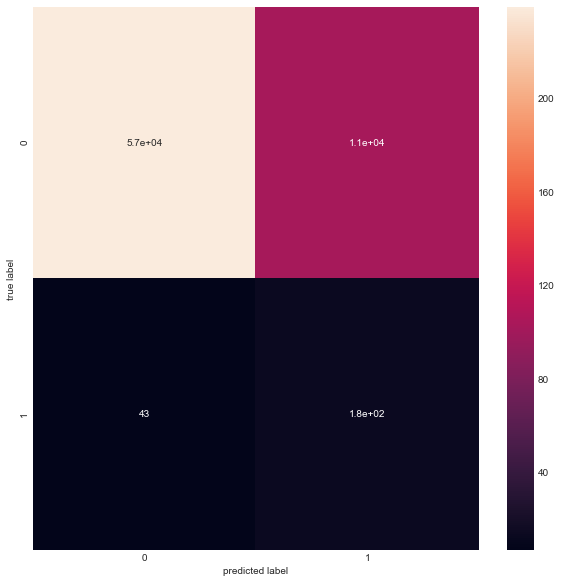

In [162]:
tn,  fp,  fn,  tp  =  metrics.confusion_matrix(ytest,logreg.predict(xtest_s)).ravel()
print('True Positives: ' + str(tp))
print('True Negatives: ' + str(tn))
print('False Positives: ' + str(fp))
print('False Negatives: ' + str(fn))
def plot_confusion(clf, x, y):
    fig = plt.figure(figsize=(10,10))
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True);
    plt.ylabel("true label")
    plt.xlabel("predicted label")
    
plot_confusion(logreg,xtest_s,ytest)

In [71]:
# Print feature importance
feature_importance = list(zip(X.columns, logreg.coef_[0]))
feature_importance.sort(key=lambda x: abs(x[1]))
best = pd.DataFrame(feature_importance,columns=["Feature",'Importance'])[::-1]
filter_cols = best[:20]['Feature'].values


In [72]:
plt.figure(num=None, figsize=(25, 20), dpi=500, facecolor='w', edgecolor='k')
plt.bar(best['Feature'],best['Importance'])

<Container object of 147 artists>

## Confusion Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a8ac550>]],
      dtype=object)

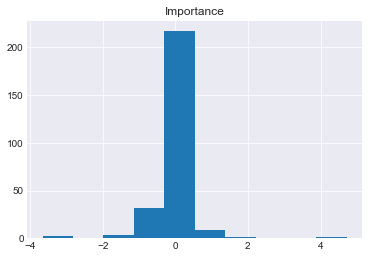

# Random Forrests

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(xtrain_s,ytrain)
y_pred = rf.predict(xtest_s)

print("Test set accuracy: ", accuracy_score(ytest,y_pred))
print("Classification Report:\n", metrics.classification_report(ytest,y_pred))

Test set accuracy:  0.9977207223104523
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     67784
          1       0.79      0.40      0.53       220

avg / total       1.00      1.00      1.00     68004



In [51]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(xtest_s)

print("Test set accuracy: ", accuracy_score(ytest,y_pred))
print("Classification Report:\n", metrics.classification_report(ytest,y_pred))

ValueError: Mix type of y not allowed, got types {'binary', 'continuous-multioutput'}

In [ ]:
# Predict all holdout rows and merge onto holdout dataframe
#df_pluto_holdout = df_pluto_holdout.reset_index()
df_pluto_holdout_predict=  df_pluto_holdout[df_pluto_holdout.columns.difference(['BBL','index','level_0'])]
y_pred = logreg.predict_proba((df_pluto_holdout_predict>.1))
#df_pluto_holdout_ref = df_pluto_holdout_ref.reset_index()
predictions = pd.DataFrame(y_pred,columns=['VacantRemains','VacantChanged'])
df_pluto_holdout_ref = df_pluto_holdout.join(predictions)


#df_pluto_holdout_ref = pd.merge(df_pluto_holdout,predictions,how='inner', left_index=True, right_index=True)


#df_pluto_holdout_ref = pd.merge(df_pluto_holdout_ref,df_pluto_holdout[['BBL']],left_on=['Block','Lot'])
df_pluto_holdout_ref.to_csv('../data/cartodb_predictions.csv')
df_pluto_holdout_ref


In [95]:
df_pluto_holdout

AssessLand  AssessTot         BBL  BldgArea  BldgDepth  BldgFront  \
15            1944       1944  3000070012         0       0.00       0.00   
81            9786       9786  3000330035         0       0.00       0.00   
91            9264       9264  3000340010         0       0.00       0.00   
117         290250     290250  3000360040         0       0.00       0.00   
157          26700      26700  3000430018         0       0.00       0.00   
164          16920      16920  3000430028         0       0.00       0.00   
166         237150     237150  3000430037         0       0.00       0.00   
177           9082       9082  3000440030         0       0.00       0.00   
178          19192      19192  3000440031         0       0.00       0.00   
182          23140      23140  3000440049         0       0.00       0.00   
186          85940      85940  3000450001         0       0.00       0.00   
201         265032     265032  3000530001         0       0.00       0.00   
229         151650     151650  3000560037         0       0.00       0.00   
259         225220     225220  3000880001         0       0.00       0.00   
270          18000      18000  3001080001         0       0.00       0.00   
272          99000      99000  3001080009         0       0.00       0.00   
279           6826       6826  3001080025         0       0.00       0.00   
300          69300      69300  3001200015         0       0.00       0.00   
301          83700      83700  3001200016         0       0.00       0.00   
302         103500     103500  3001200017         0       0.00       0.00   
303         135000     135000  3001200018         0       0.00       0.00   
326          33480      33480  3001210021         0       0.00       0.00   
336          12420      12420  3001210036         0       0.00       0.00   
383          76680      76680  3001460011         0       0.00       0.00   
384          50220      50220  3001460012         0       0.00       0.00   
387          58860      58860  3001460016         0       0.00       0.00   
388         124740     124740  3001460017         0       0.00       0.00   
392         108000     108000  3001460034         0       0.00       0.00   
393         135540     135540  3001460035         0       0.00       0.00   
394         135540     135540  3001460036         0       0.00       0.00   
415        5208750    5208750  3001490001         0       0.00       0.00   
616           1684       1684  3001960032         0       0.00       0.00   
650           4640       4640  3001960135         0       0.00       0.00   
687           5494       5494  3001980022         0       0.00       0.00   
688           4579       4579  3001980023         0       0.00       0.00   
709         166950     166950  3001980046         0       0.00       0.00   
710          18721      18721  3001980047         0       0.00       0.00   
1300       1800000    1800000  3002440011         0       0.00       0.00   
1304        460800     460800  3002440026         0       0.00       0.00   
1306         42300      42300  3002450002         0       0.00       0.00   
1435         17520      17520  3002510046         0       0.00       0.00   
1436         17520      17520  3002510047         0       0.00       0.00   
2126         42300      42300  3002780001         0       0.00       0.00   
2331        396450    1344150  3002950009         0       0.00       0.00   
2336        112500     112500  3002950014         0       0.00       0.00   
2514           432        432  3003010091         0       0.00       0.00   
2618           432        432  3003050122         0       0.00       0.00   
2688        101700     101700  3003070026         0       0.00       0.00   
2738         12060      12060  3003090042         0       0.00       0.00   
2739         12060      12060  3003090043         0       0.00       0.00   
2849        267300     267300  3003140031         0       0.00       0.00   
2851

In [117]:
# COMBINED

threshold = .7
df_pluto_holdout_predict=  df_pluto_holdout[df_pluto_holdout.columns.difference(['BBL','index','level_0'])]

predicted_probs_rf = rf.predict_proba(df_pluto_holdout_predict).round(3)
predictions_rf = rf.predict(df_pluto_holdout_predict)

rf_probs = pd.DataFrame(predicted_probs_rf,columns=['vacant_remain_prob','vacant_change_prob'])
rf_probs['predicted'] = (rf_probs.vacant_change_prob > threshold).astype(float)
rf_probs
#rf_preds = pd.DataFrame(predictions_rf,columns=['vacant_remain','vacant_change'])
#pd.DataFrame(predictions_rf)[0].value_counts()

#df_pluto_holdout_ref = df_pluto_holdout.join(y_test_rf_df)
#df_pluto_holdout_ref

print(f"Classification Report at {threshold} threshold:\n", metrics.classification_report(ytest,
                                                                                 rf_probs.predicted))

ValueError: Found input variables with inconsistent numbers of samples: [68004, 4876]

In [59]:
#lr probabilities per category for first five samples
predicted_probs_rf = rf.predict_proba(xtest_s).round(3)
predictions_rf = rf.predict(xtest_s)


thanks! it looks like i was added back before the second sign-up round happened -- i was able to get the same spot that i had before someone wiped out the entire 

print("RF predicted probabilities for first five samples in test set:\n",predicted_probs_rf[:5])
print("RF predictions for first five samples in test set:\n",predictions_rf[:5])
y_test_rf_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_rf,predictions_rf.reshape((predictions_rf.shape[0],-1)),
        ytest.reshape((ytest.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"]
)

y_test_rf_df.head()
threshold=  .3
y_test_rf_df["predicted_A"] = (y_test_rf_df.class_1 > threshold).astype(float)
print(y_test_rf_df.head())
print("Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_rf_df.actual,
                                                                      y_test_rf_df.predicted),"\n")
print("Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_rf_df.actual,
                                                                                          y_test_rf_df.predicted),"\n")
print(f"Confusion matrix at {threshold} threshold:\n",metrics.confusion_matrix(y_test_rf_df.actual,
                                                                      y_test_rf_df.predicted_A),"\n")
print(f"Classification Report at {threshold} threshold:\n", metrics.classification_report(y_test_rf_df.actual,
                                                                                 y_test_rf_df.predicted_A))

RF predicted probabilities for first five samples in test set:
 [[1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]]
RF predictions for first five samples in test set:
 [0 0 0 0 0]
   class_0  class_1  predicted  actual  predicted_A
0     1.00     0.00       0.00    0.00         0.00
1     1.00     0.00       0.00    0.00         0.00
2     0.93     0.07       0.00    0.00         0.00
3     1.00     0.00       0.00    0.00         0.00
4     1.00     0.00       0.00    0.00         0.00
Confusion matrix at original 0.5 threshold:
 [[67760    24]
 [  131    89]] 

Classification Report at original 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     67784
        1.0       0.79      0.40      0.53       220

avg / total       1.00      1.00      1.00     68004
 

Confusion matrix at 0.3 threshold:
 [[67690    94]
 [   68   152]] 



/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


Classification Report at 0.3 threshold:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     67784
        1.0       0.62      0.69      0.65       220

avg / total       1.00      1.00      1.00     68004



In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfs = RandomForestClassifier(n_estimators = 100)
rfs.fit(xtrain_s,ytrain)
y_pred = rfs.predict(xtest_s)

test_score = rf.score(xtest_s,ytest)
train_score = rf.score(xtrain_s,ytrain)

print(f'test: {test_score} train: {train_score}')


print("Test set accuracy: ", accuracy_score(ytest,y_pred))
print("Classification Report:\n", metrics.classification_report(ytest,y_pred))



KeyboardInterrupt: 

In [16]:
import pickle
pickle.dump(rf, open('../data/pkl/rf-alldata-final-scaled-last.pkl', 'wb'))
#rf = rfs

In [11]:
import pickle
with open(r"../data/pkl/rf-alldata-final-scaled-last.pkl", "rb") as input_file:
    rf = pickle.load(input_file)

In [178]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
feature_importance = pd.DataFrame({'Features':X.columns, "Important":rf.feature_importances_}).sort_values(by='Important',ascending=False)[:13]
feature_importance = feature_importance[feature_importance['Features'] != "FloorCountBucket"]
feature_importance['Important'] = feature_importance['Important']
rf_features = feature_importance['Features'][:22].values
feature_importance
#feature_importance = feature_importance.sort_val

Features  Important
146   YearBuilt      0.188
127    NumBldgs      0.081
128   NumFloors      0.058
116    FacilFAR      0.043
0    AssessLand      0.040
1     AssessTot      0.038
6      BsmtCode      0.035
144  YearAlter1      0.030
4     BldgFront      0.028
131    ProxCode      0.025
133    ResidFAR      0.024
132     ResArea      0.022

In [ ]:

 
# Reorder it following the values:
#ordered_df = df.sort_values(by='values')
my_range = range(1,len(feature_importance)+1)
my_range
plt.style.use('fivethirtyeight')
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
feature_importance = feature_importance.sort_values(by='Important',ascending=True)
fig = plt.figure(figsize=(8,10),dpi=300,facecolor='w', edgecolor='k')
plt.vlines(x=my_range, ymin=0, ymax=feature_importance['Important'], color='skyblue')
#plt.hlines(y=my_range, xmin=0, xmax=feature_importance['Important'], color='skyblue')
plt.plot(feature_importance['Important'], my_range, "o")

# Add titles and axis names
plt.yticks(my_range, feature_importance['Features'])
plt.xlabel('Importance',labelpad = 20,fontsize=14)
plt.ylabel('Features',labelpad = 10,fontsize=14)

Text(0,0.5,'Features')

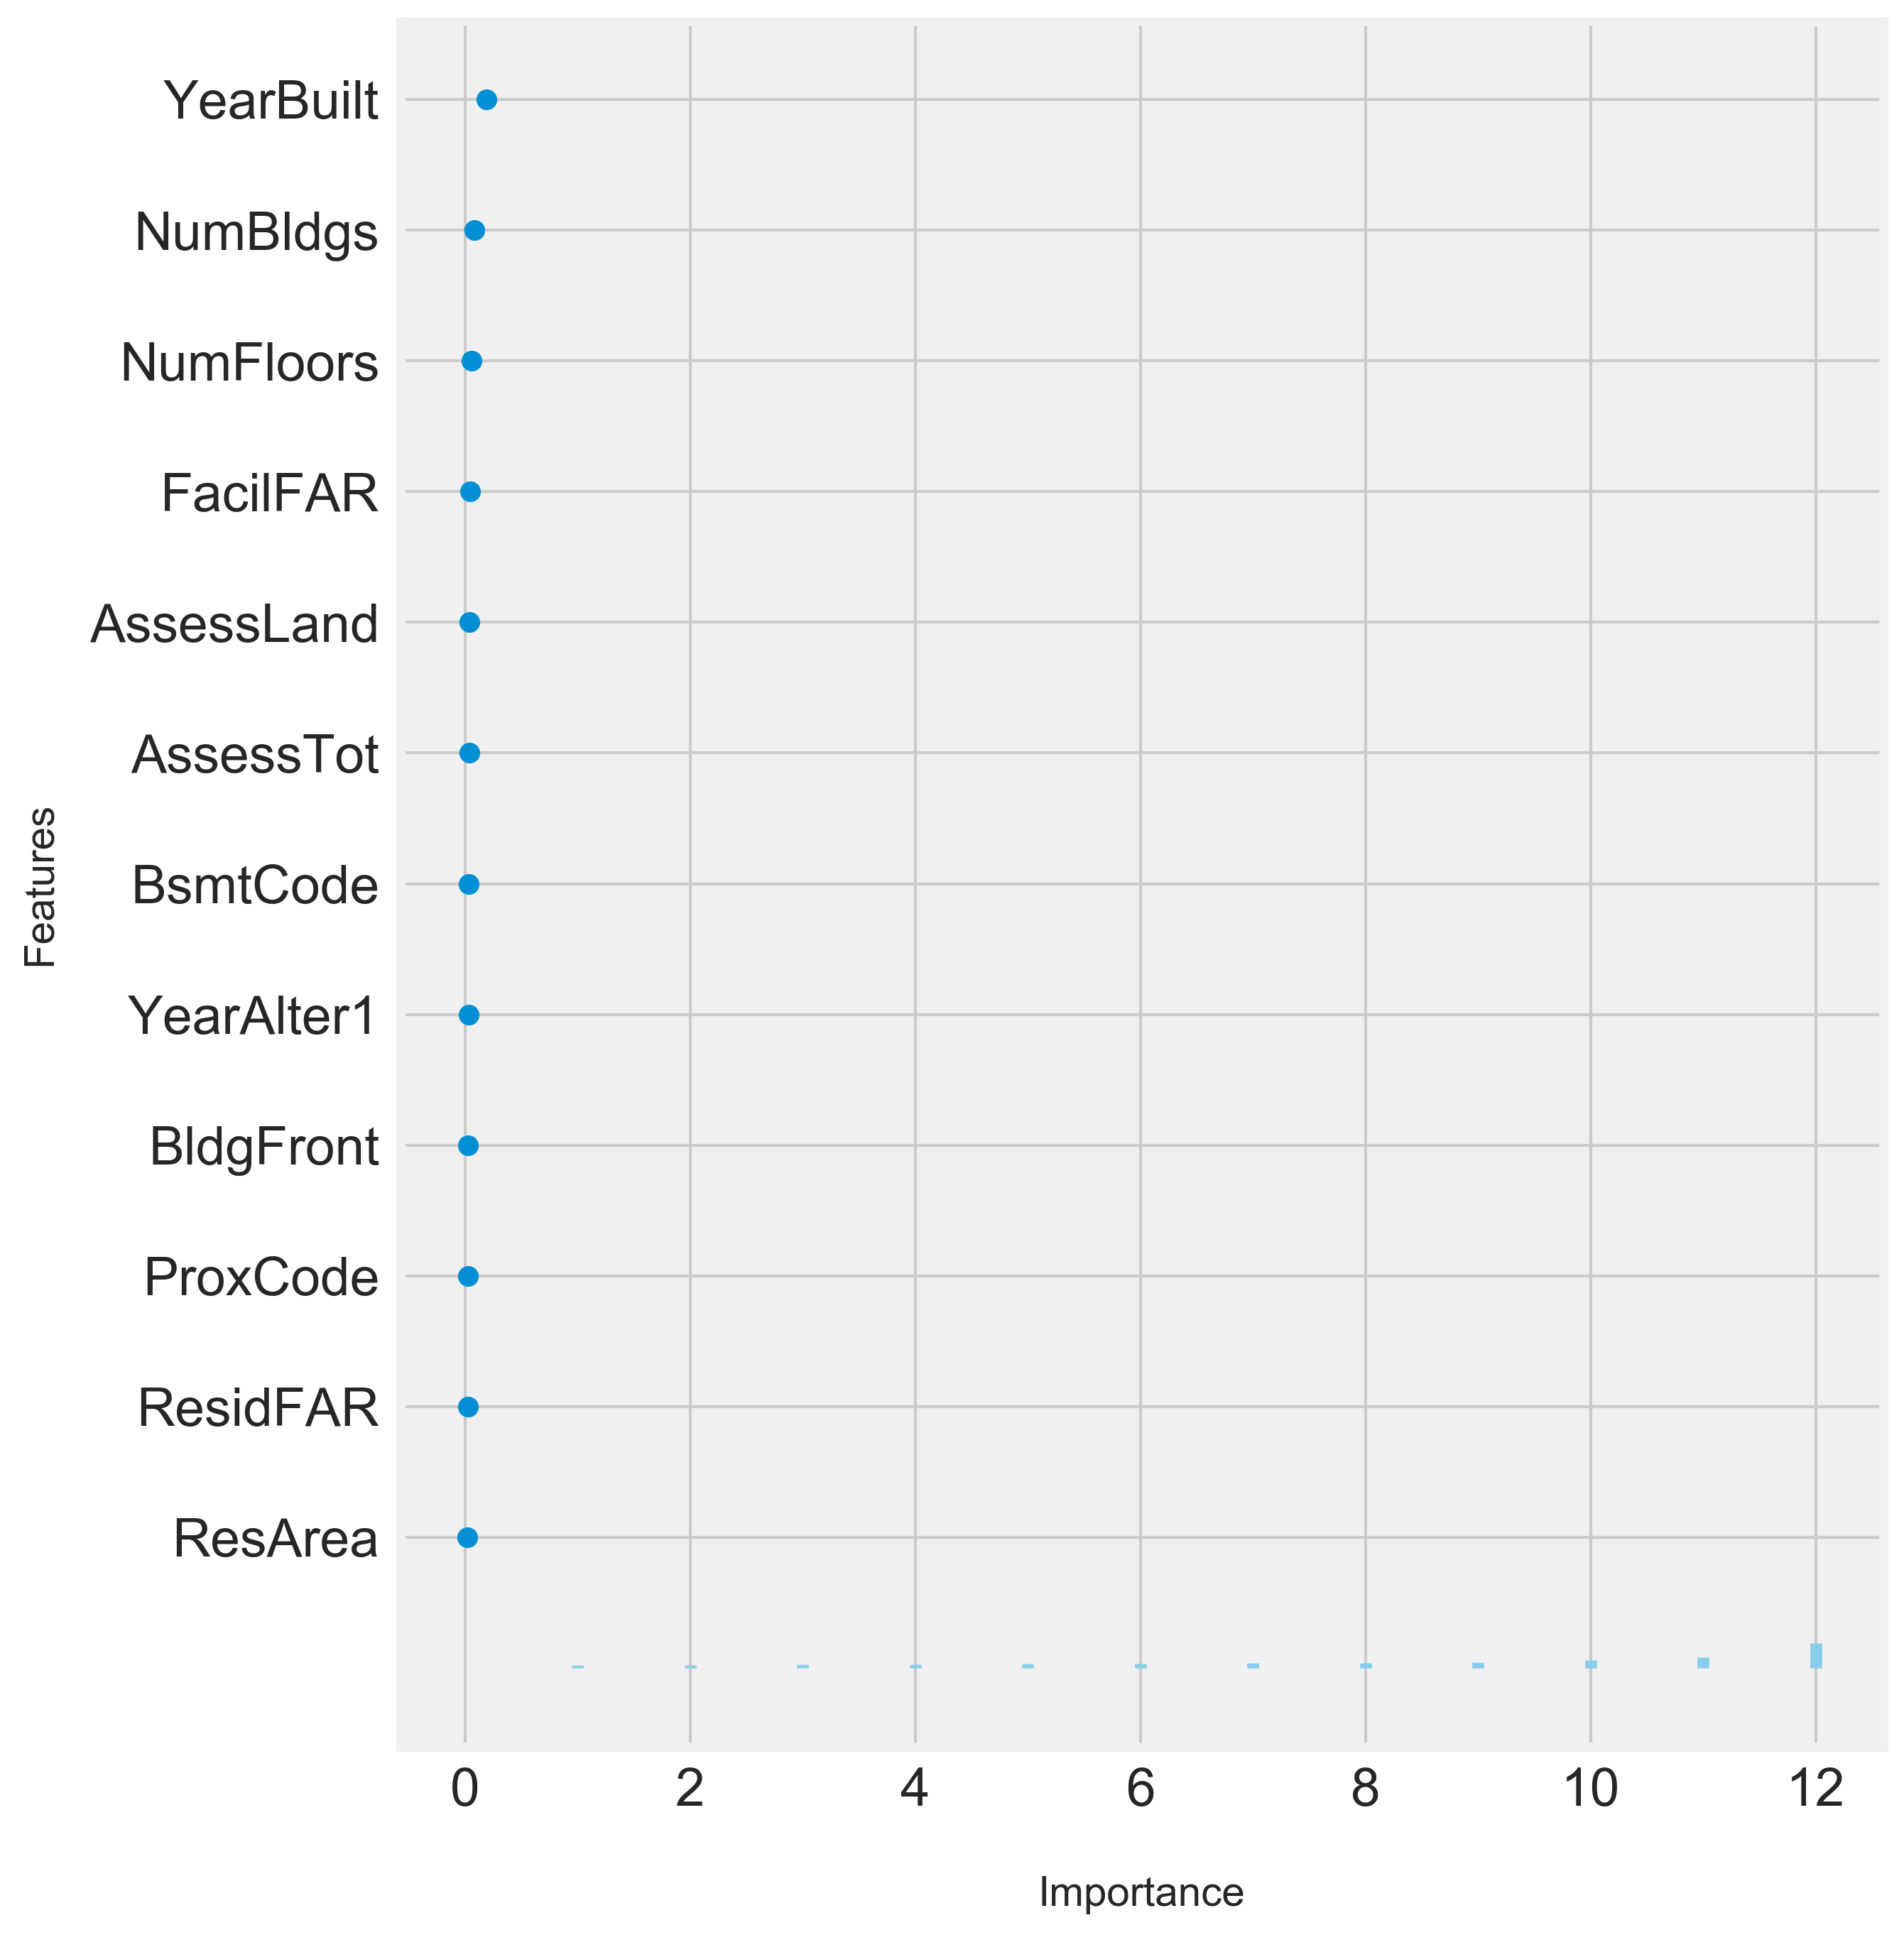

In [214]:

 
# Reorder it following the values:
#ordered_df = df.sort_values(by='values')
my_range = range(1,len(feature_importance)+1)
my_range
plt.style.use('fivethirtyeight')
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
feature_importance = feature_importance.sort_values(by='Important',ascending=True)
fig = plt.figure(figsize=(8,10),dpi=300,facecolor='w', edgecolor='k')
plt.vlines(x=my_range, ymin=0, ymax=feature_importance['Important'], color='skyblue')
#plt.hlines(y=my_range, xmin=0, xmax=feature_importance['Important'], color='skyblue')
plt.plot(feature_importance['Important'], my_range, "o")

# Add titles and axis names
plt.yticks(my_range, feature_importance['Features'])
plt.xlabel('Importance',labelpad = 20,fontsize=14)
plt.ylabel('Features',labelpad = 10,fontsize=14)

In [ ]:

# Reorder it following the values:
#ordered_df = df.sort_values(by='values')
my_range = range(1,len(feature_importance)+1)
my_range
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
fig = plt.figure(figsize=(14,10),dpi=300,facecolor='w', edgecolor='k')

plt.vlines(x=my_range, ymin=0, ymax=feature_importance['Important'], color='skyblue')
plt.plot(my_range,feature_importance['Important'] , "o")

# Add titles and axis names
plt.xticks(my_range, feature_importance['Features'],rotation=-90)
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Importance')
plt.ylabel('Features')


True Positives: 89
True Negatives: 67760
False Positives: 24
False Negatives: 131


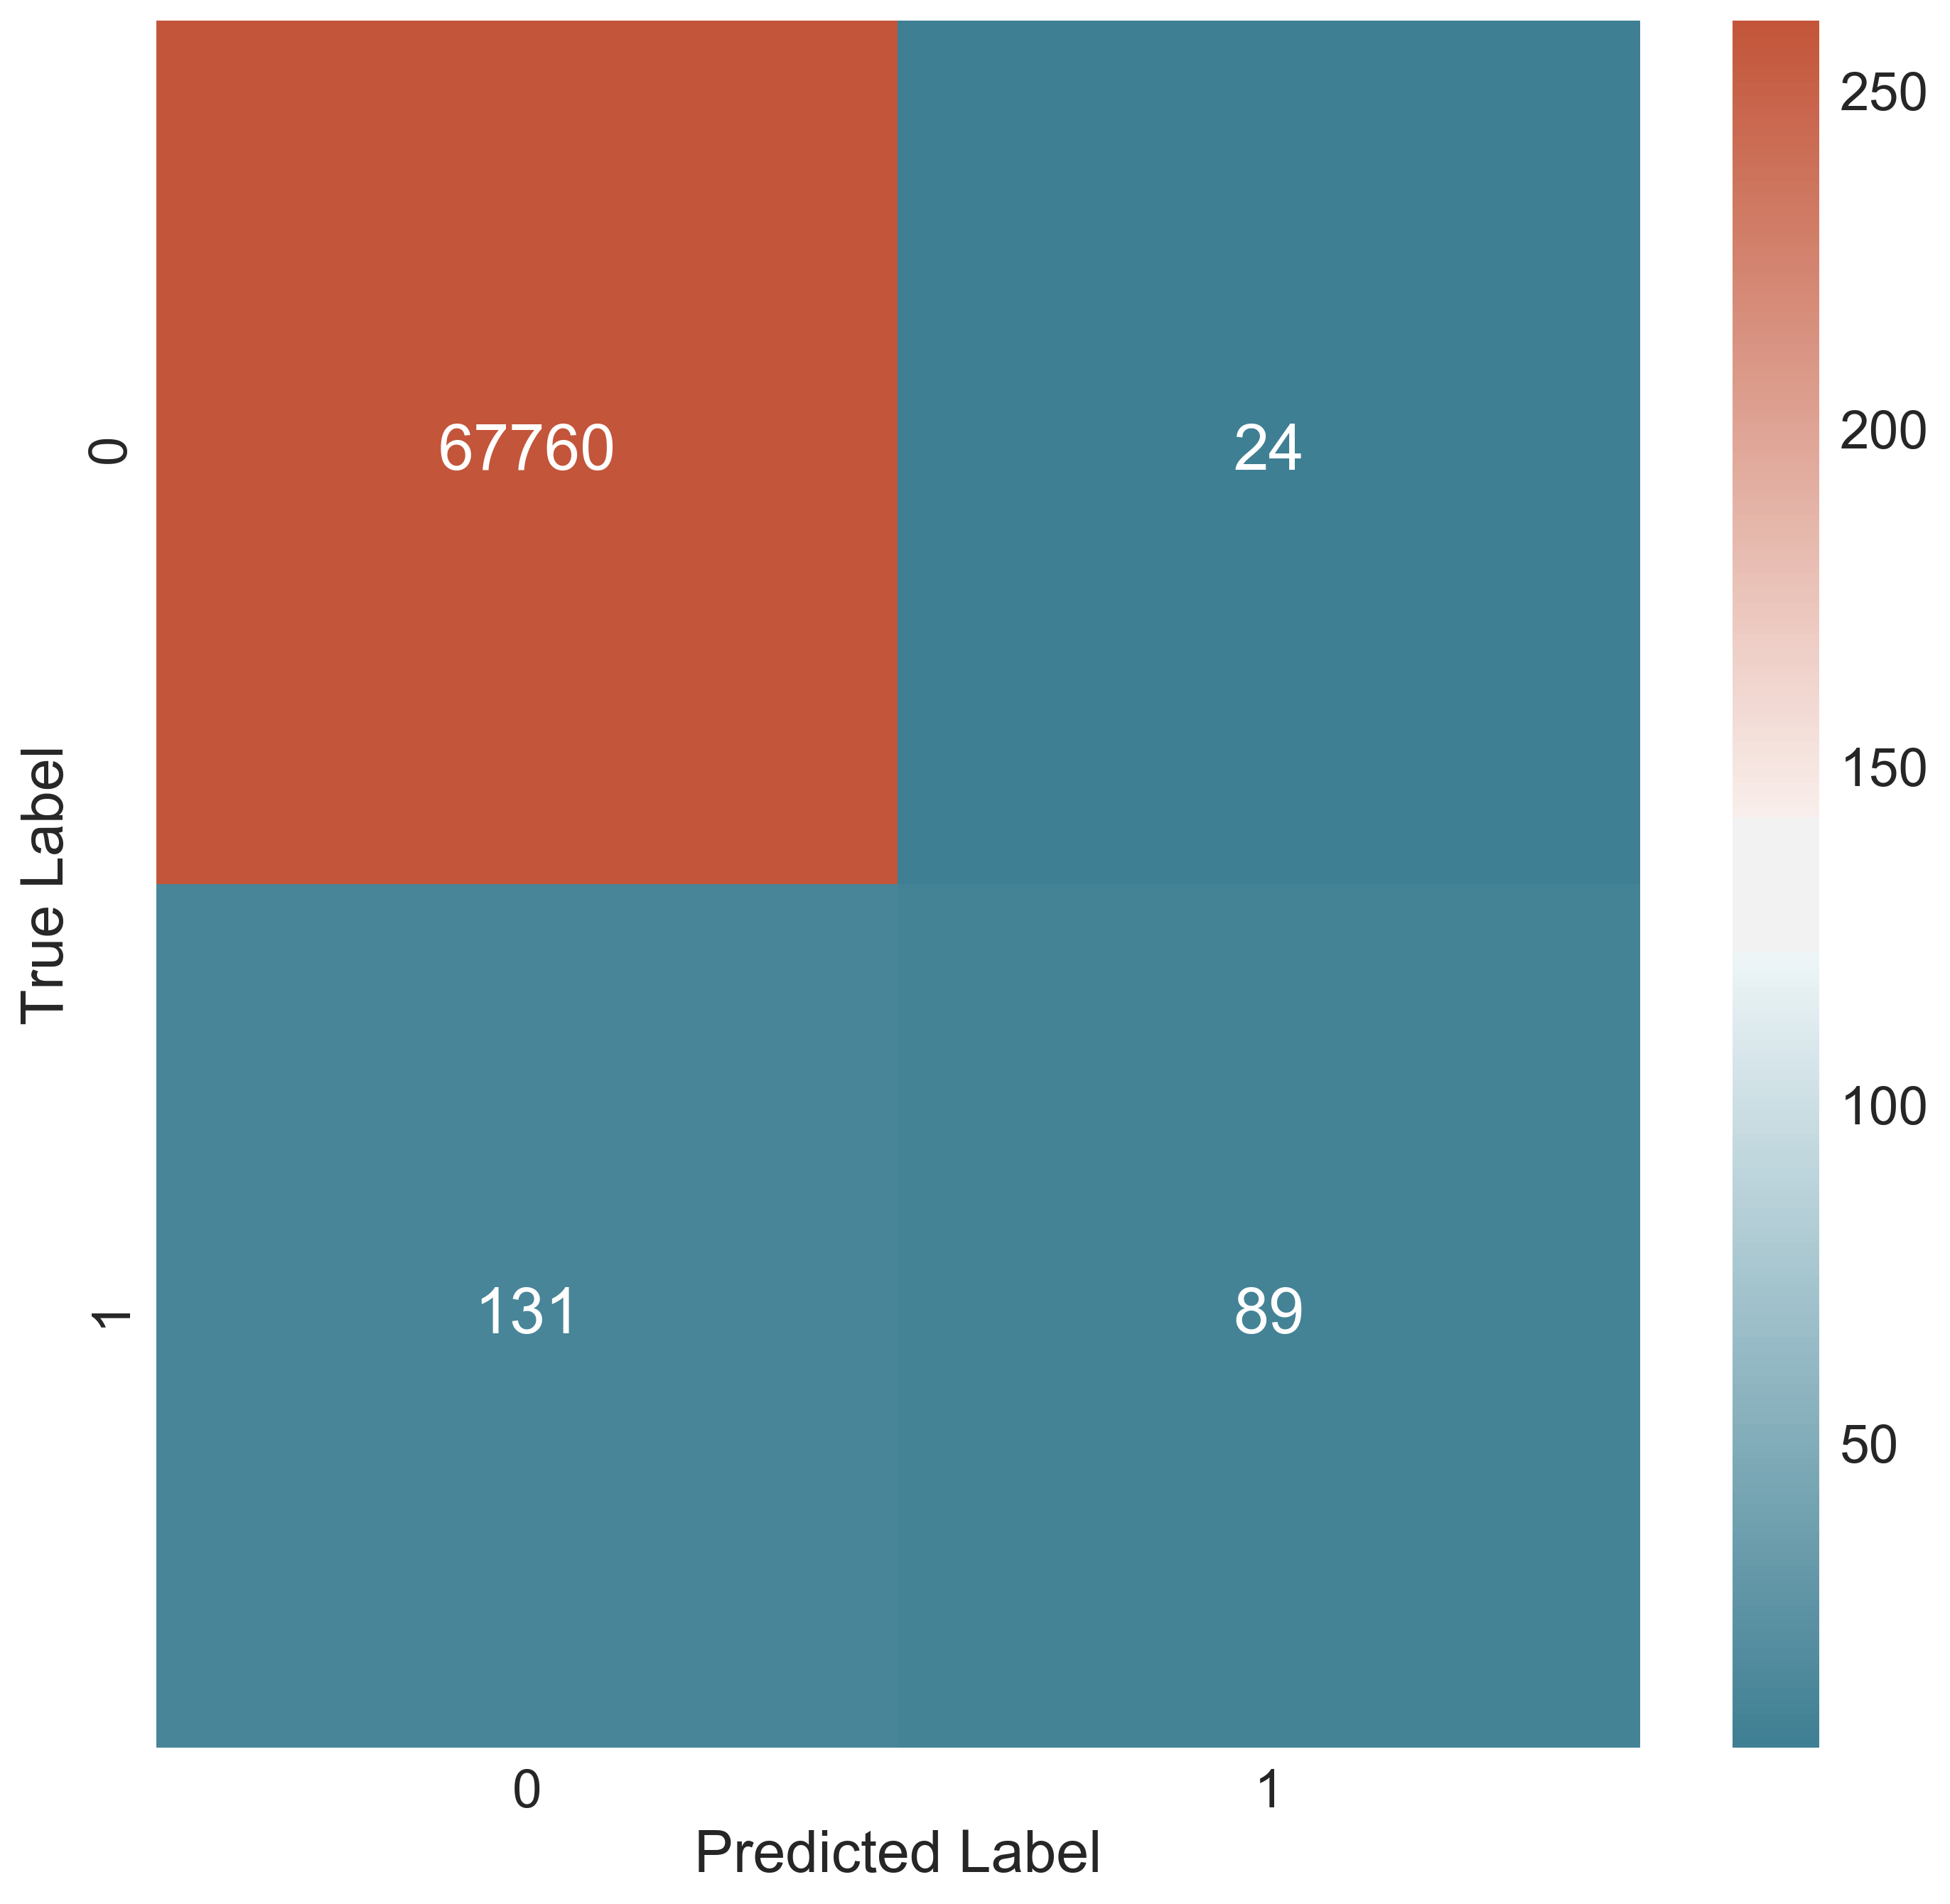

In [185]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
def plot_confusion(clf, x, y):
    plt.style.use('fivethirtyeight')
    tn,  fp,  fn,  tp  =  metrics.confusion_matrix(y,clf.predict(x)).ravel()
    cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
    print('True Positives: ' + str(tp))
    print('True Negatives: ' + str(tn))
    print('False Positives: ' + str(fp))
    print('False Negatives: ' + str(fn))
    fig = plt.figure(figsize=(10,10),dpi=300,facecolor='w', edgecolor='k')
    y_pred = clf.predict(x)
    c_mat = metrics.confusion_matrix(y,y_pred)
    labels = np.unique(y)
    sns.set(font_scale=1.8)
    sns.heatmap(
        np.sqrt(c_mat),
        annot=c_mat,
        xticklabels=labels,
        yticklabels=labels,
        cbar=True,
        cmap=cmap, 
        fmt='g');
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

plot_confusion(rf,xtest_s,ytest)

# Plot ROC/AUC

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Text(0,0.5,'True Positive Rate (Sensitivity)')

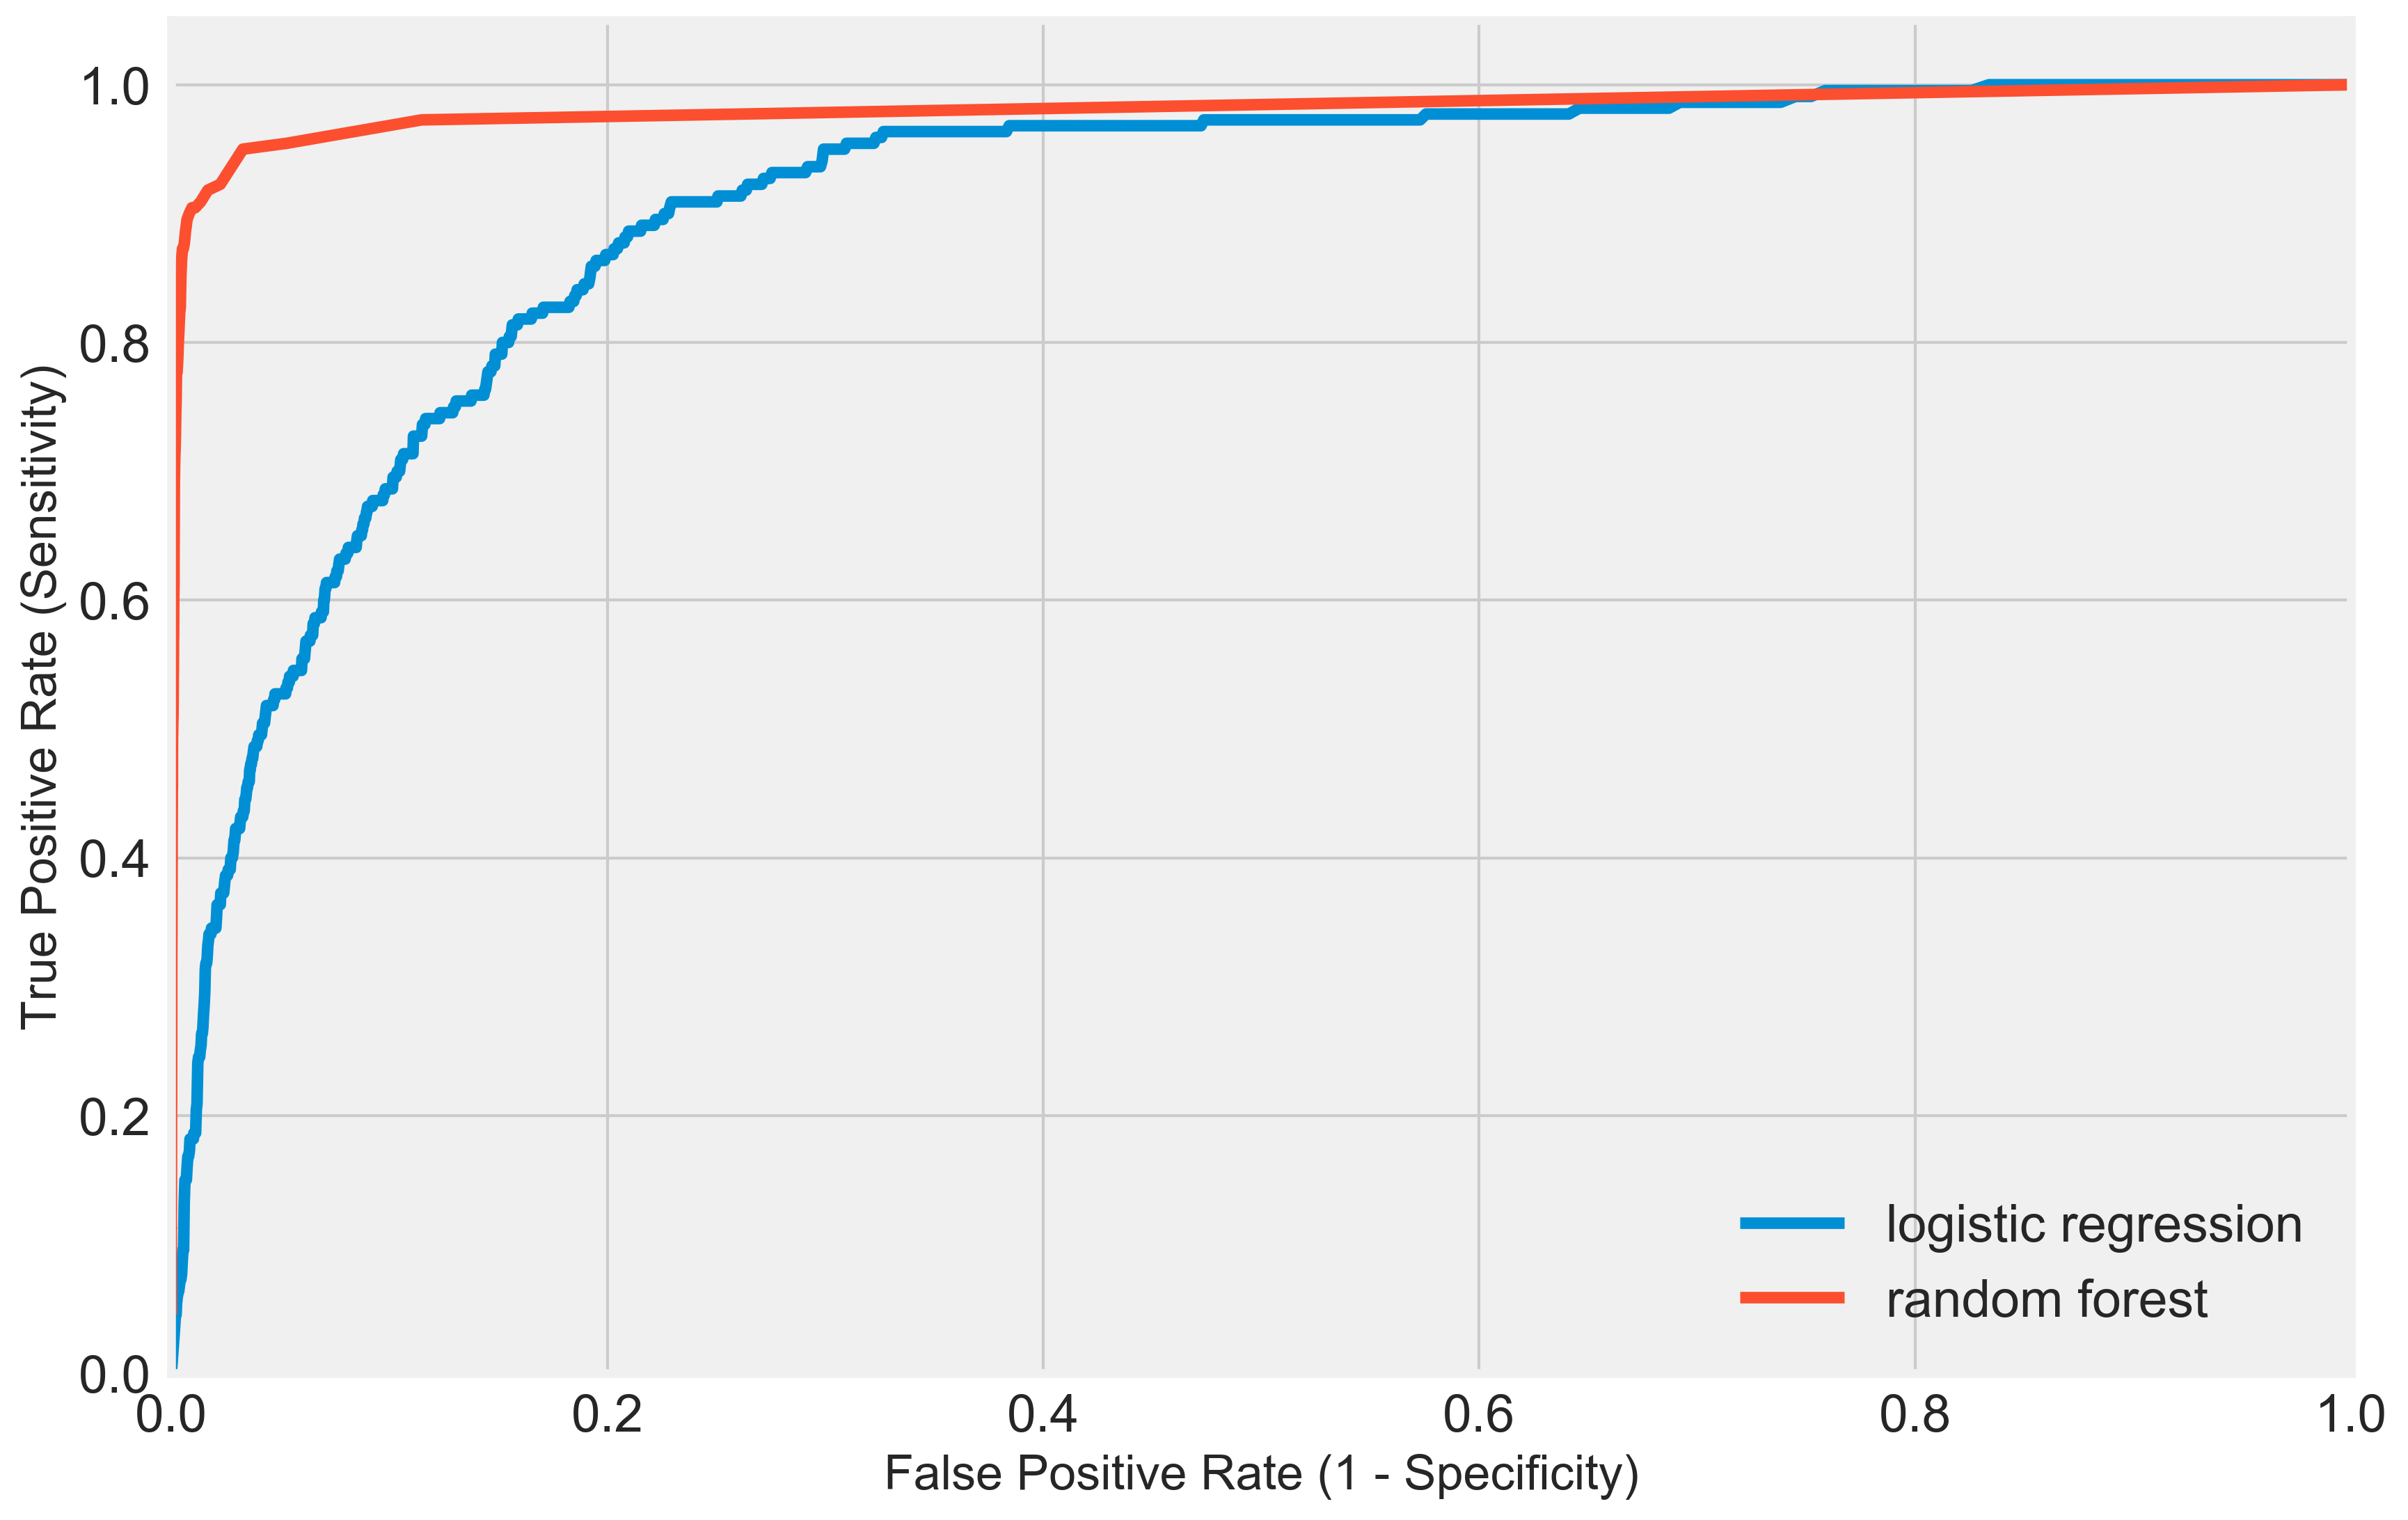

In [62]:
import seaborn as sns
sns.set_style("darkgrid")
predicted_probs_lr = logreg.predict_proba(xtest_s).round(3)
predictions_lr = logreg.predict(xtest_s)

predicted_probs_rf = rf.predict_proba(xtest_s)
predictions_rf = rf.predict(xtest_s)

#generate lr model false positive and true positive rates
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(ytest, predicted_probs_lr[:,1])

#generate same for random forest model
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(ytest, predicted_probs_rf[:,1])

# plot LR and RF model ROC curves
plt.style.use('fivethirtyeight')
plt.figure(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')
plt.plot(fpr_lr, tpr_lr,label="logistic regression")
plt.plot(fpr_rf, tpr_rf,label="random forest")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


Text(0.5,1,'Precision-Recall Curve')

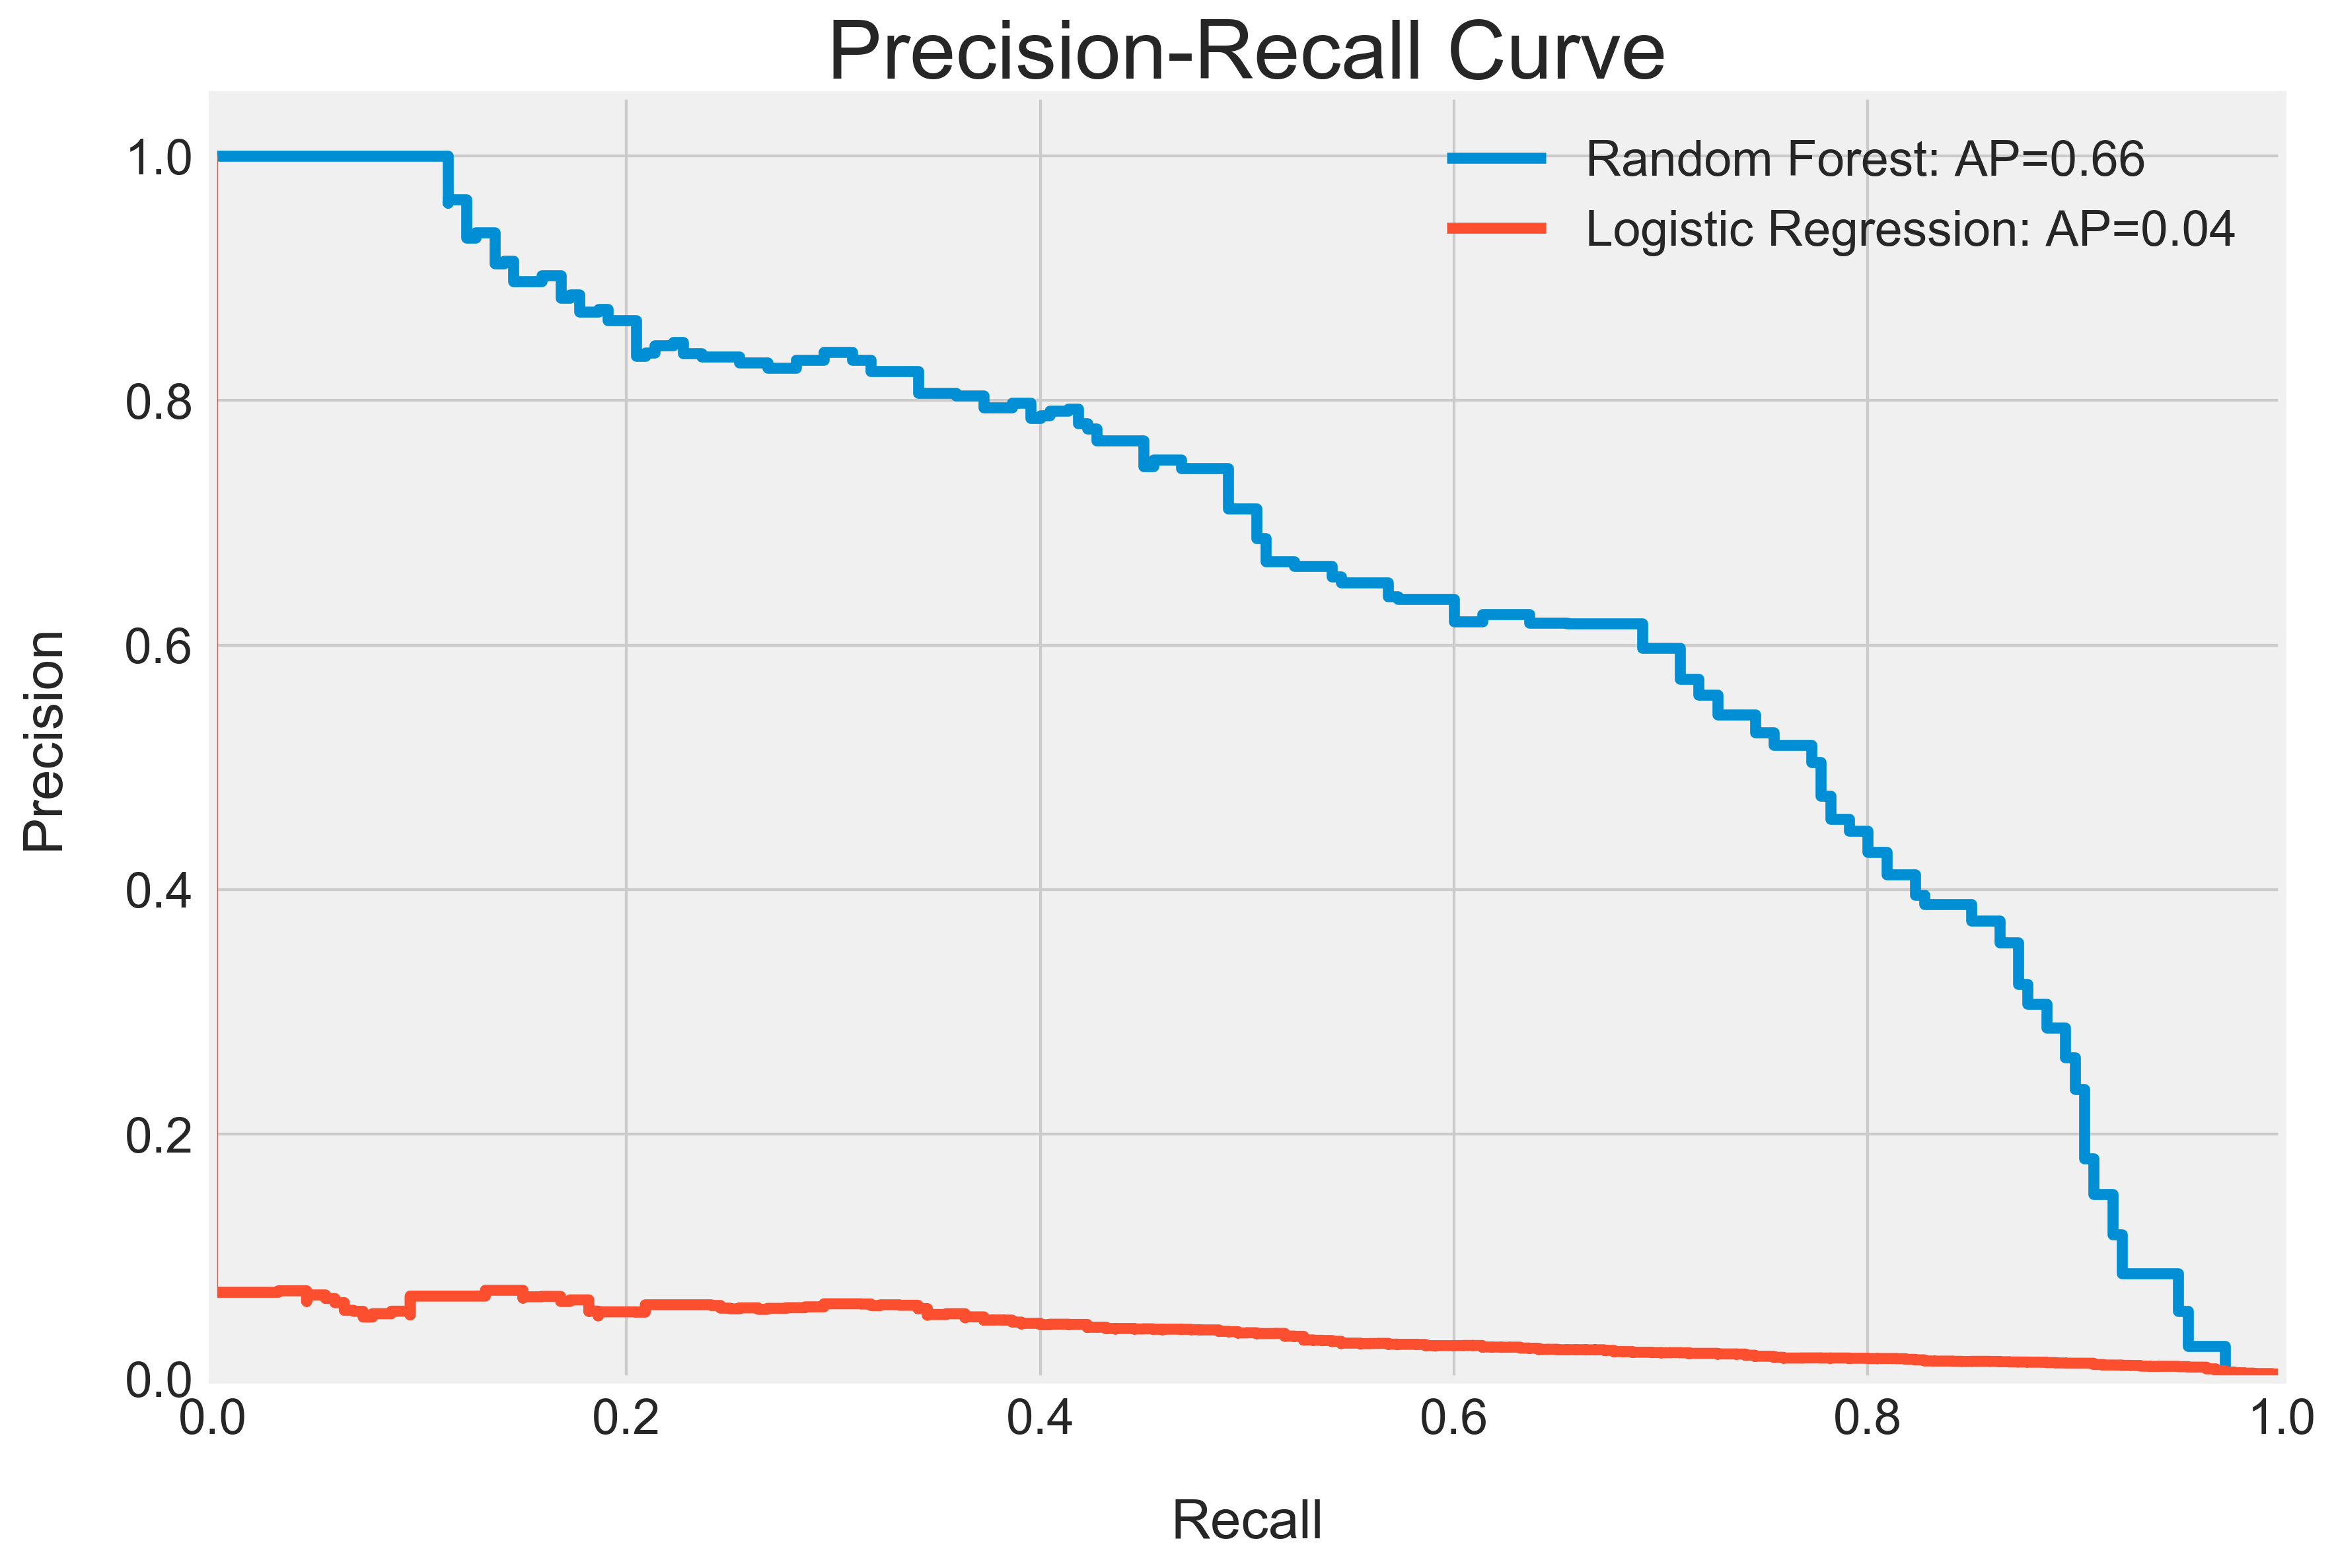

In [183]:
from sklearn.metrics import average_precision_score
average_precision_rf = average_precision_score(ytest, predicted_probs_rf[:,1])
average_precision_lr = average_precision_score(ytest, predicted_probs_lr[:,1])

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_score_rf = rf.predict_proba(xtest_s)
y_score_lf = logreg.predict_proba(xtest_s)
precision_rf, recall_rf, _ = precision_recall_curve(ytest, predicted_probs_rf[:,1])
precision_lr, recall_lr, _ = precision_recall_curve(ytest, predicted_probs_lr[:,1])

plt.style.use('fivethirtyeight')
plt.figure(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')
plt.step(recall_rf, precision_rf, alpha=1, where='post')
#plt.fill_between(recall_rf, precision_rf, step='post', alpha=0.2, color='b')
plt.step(recall_lr, precision_lr, alpha=1, where='post')
#plt.fill_between(recall_lr, precision_lr, step='post', alpha=0.2, color='b')


plt.xlabel('Recall',labelpad = 20,fontsize=20)
plt.ylabel('Precision',labelpad = 20,fontsize=20)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.legend(['Random Forest: AP={0:0.2f}'.format(average_precision_rf),'Logistic Regression: AP={0:0.2f}'.format(average_precision_lr)],loc="upper right")


plt.title('Precision-Recall Curve',fontsize=30)
#plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision_rf))


Text(0.5,1,'2-class Precision-Recall curve: AP=0.03')

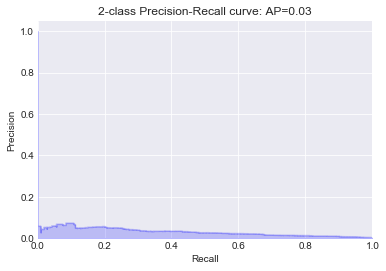

In [43]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest, predicted_probs_lr[:,1])

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y_score = rf.predict_proba(xtest_s)
precision, recall, _ = precision_recall_curve(ytest, predicted_probs_lr[:,1])

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

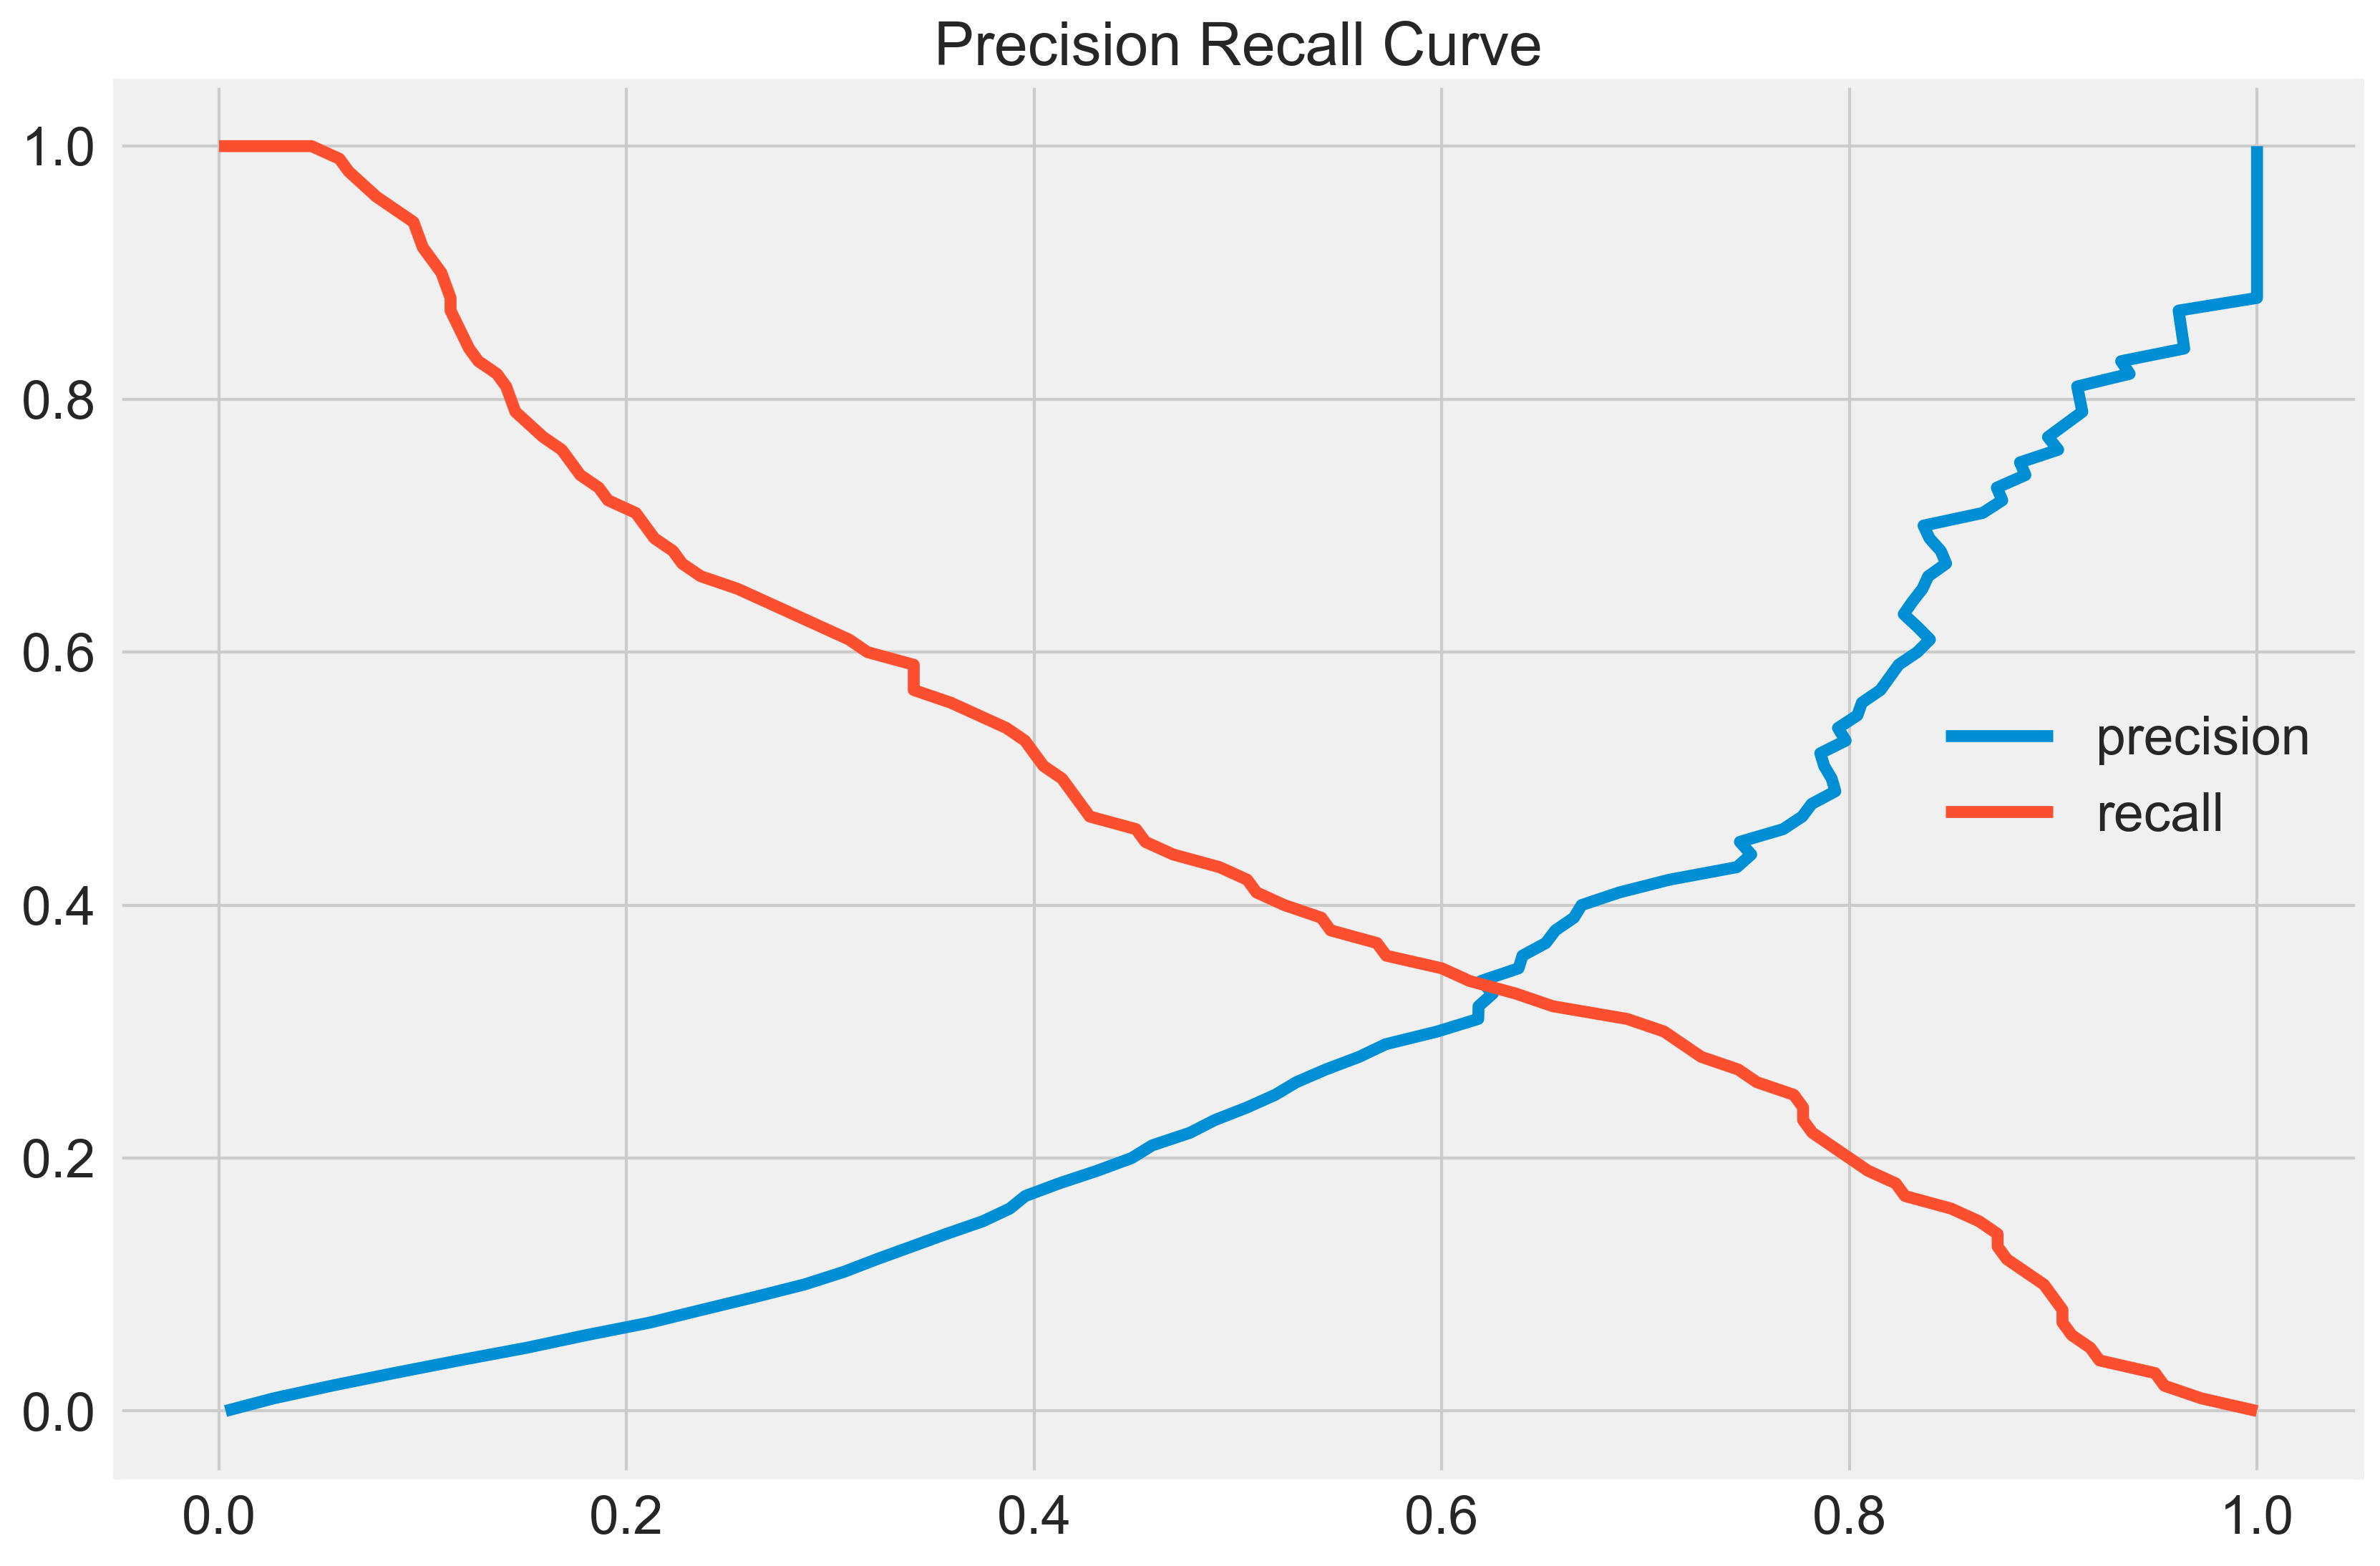

In [27]:
from sklearn.metrics import precision_recall_curve

p,r,t=precision_recall_curve(ytest,predicted_probs_rf[:,1])

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])
plt.figure(num=None, figsize=(12, 8), dpi=300, facecolor='w', edgecolor='k')


plt.plot(p,t,label="precision")
plt.plot(r,t,label="recall");
plt.legend()
plt.title('Precision Recall Curve');

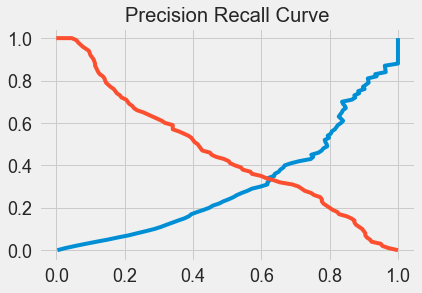

In [23]:
from sklearn.metrics import precision_recall_curve

p,r,t=precision_recall_curve(ytest,predicted_probs_rf[:,1])

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve');

Text(0,0.5,'True Positive Rate (Sensitivity) or Class 1 Threshold Probability')

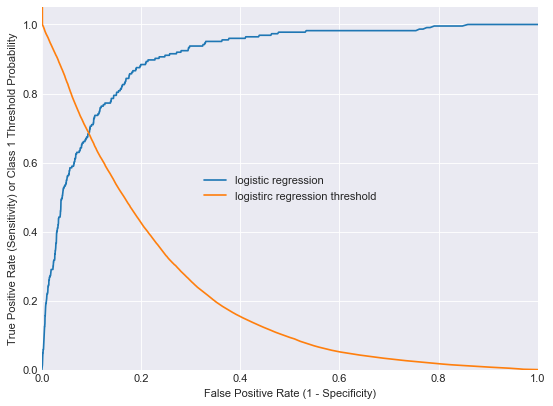

In [32]:
# plot LR and RF model ROC curves
plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr_lr, tpr_lr,label="logistic regression")
plt.plot(fpr_lr,thresholds_lr, label="logistirc regression threshold")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="center")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity) or Class 1 Threshold Probability')


array([0, 0, 0, ..., 0, 0, 0])

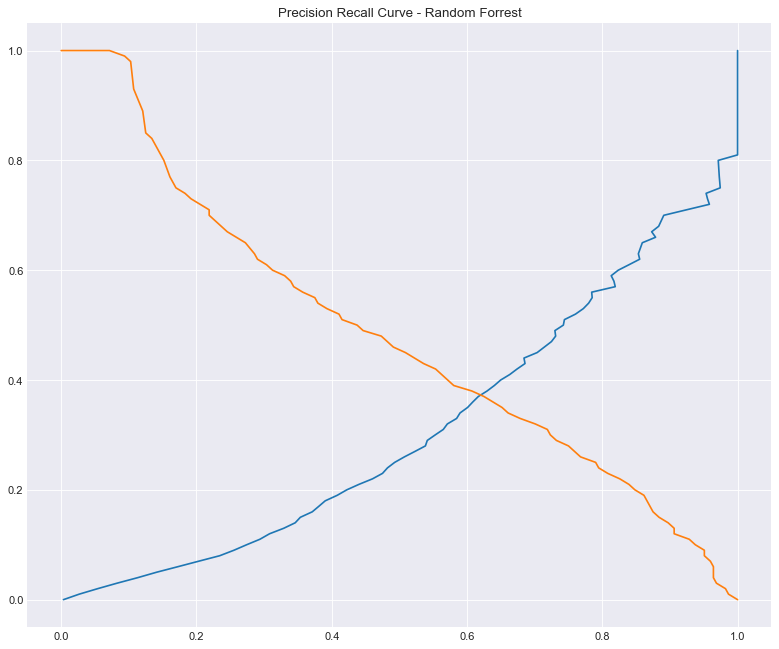

In [34]:
from sklearn.metrics import precision_recall_curve
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
y_score=rf.predict_proba(xtest_s)[:,1]
p,r,t=precision_recall_curve(ytest,y_score)

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve - Random Forrest');
y_pred

In [ ]:
from sklearn.metrics import precision_recall_curve
y_score=logreg.predict_proba(xtest_s)[:,1]
p,r,t=precision_recall_curve(ytest,y_score)

# adding last threshold of '1' to threshold list
t=np.vstack([t.reshape([-1,1]),1])

plt.plot(p,t)
plt.plot(r,t);
plt.title('Precision Recall Curve - Logistic Regression');
y_pred

In [124]:
#lr probabilities per category for first five samples
predicted_probs_lr = logreg.predict_proba(xtest_s).round(3)
predictions_lr = logreg.predict(xtest_s)

print("Logistic Regression predicted probabilities for first five samples in test set:\n",predicted_probs_lr[:5])
print("Logistic Regression predictions for first five samples in test set:\n",predictions_lr[:5])
y_test_lr_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_lr,predictions_lr.reshape((predictions_lr.shape[0],-1)),
        ytest.reshape((ytest.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_lr_df.head()

#lr probabilities per category for first five samples
predicted_probs_rf = rf.predict_proba(xtest_s).round(3)
predictions_rf = rf.predict(xtest_s)

print("RF predicted probabilities for first five samples in test set:\n",predicted_probs_rf[:5])
print("RF predictions for first five samples in test set:\n",predictions_rf[:5])
y_test_rf_df = pd.DataFrame(
    np.concatenate((
        predicted_probs_rf,predictions_rf.reshape((predictions_rf.shape[0],-1)),
        ytest.reshape((ytest.shape[0],-1))),axis=1
    ),
    columns = ["class_0","class_1","predicted","actual"])

y_test_rf_df.head()

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


Logistic Regression predicted probabilities for first five samples in test set:
 [[0.843 0.157]
 [0.995 0.005]
 [0.001 0.999]
 [0.967 0.033]
 [0.929 0.071]]
Logistic Regression predictions for first five samples in test set:
 [0 0 1 0 0]
RF predicted probabilities for first five samples in test set:
 [[1.   0.  ]
 [1.   0.  ]
 [0.93 0.07]
 [1.   0.  ]
 [1.   0.  ]]
RF predictions for first five samples in test set:
 [0 0 0 0 0]


/Users/justinblinder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


class_0  class_1  predicted  actual
0     1.00     0.00       0.00    0.00
1     1.00     0.00       0.00    0.00
2     0.93     0.07       0.00    0.00
3     1.00     0.00       0.00    0.00
4     1.00     0.00       0.00    0.00

In [ ]:
Logistic Regression Thresholding

In [120]:
threshold=  .5
y_test_lr_df["predicted_A"] = (y_test_lr_df.class_1 > threshold).astype(float)
print(y_test_lr_df.head())
print("Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted),"\n")
print("Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                          y_test_lr_df.predicted),"\n")
print(f"Confusion matrix at {threshold} threshold:\n",metrics.confusion_matrix(y_test_lr_df.actual,
                                                                      y_test_lr_df.predicted_A),"\n")
print(f"Classification Report at {threshold} threshold:\n", metrics.classification_report(y_test_lr_df.actual,
                                                                                 y_test_lr_df.predicted_A))

   class_0  class_1  predicted  actual  predicted_A
0     0.84     0.16       0.00    0.00         0.00
1     0.99     0.01       0.00    0.00         0.00
2     0.00     1.00       1.00    0.00         1.00
3     0.97     0.03       0.00    0.00         0.00
4     0.93     0.07       0.00    0.00         0.00
Confusion matrix at original 0.5 threshold:
 [[56683 11101]
 [   40   180]] 

Classification Report at original 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      0.84      0.91     67784
        1.0       0.02      0.82      0.03       220

avg / total       1.00      0.84      0.91     68004
 

Confusion matrix at 0.5 threshold:
 [[56693 11091]
 [   40   180]] 

Classification Report at 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      0.84      0.91     67784
        1.0       0.02      0.82      0.03       220

avg / total       1.00      0.84      0.91     68004



In [ ]:
Random Forest Thresholding

In [230]:
threshold=  .5
y_test_rf_df["predicted_A"] = (y_test_rf_df.class_1 > threshold).astype(float)
print(y_test_rf_df.head())
print("Confusion matrix at original 0.5 threshold:\n",metrics.confusion_matrix(y_test_rf_df.actual,
                                                                      y_test_rf_df.predicted),"\n")
print("Classification Report at original 0.5 threshold:\n", metrics.classification_report(y_test_rf_df.actual,
                                                                                          y_test_rf_df.predicted),"\n")
print(f"Confusion matrix at {threshold} threshold:\n",metrics.confusion_matrix(y_test_rf_df.actual,
                                                                      y_test_rf_df.predicted_A),"\n")
print(f"Classification Report at {threshold} threshold:\n", metrics.classification_report(y_test_rf_df.actual,
                                                                                 y_test_rf_df.predicted_A))
#plot_confusion(rf,y_test_rf_df.actual,y_test_rf_df.predicted_A)
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.cubehelix_palette(20, start=2, rot=0, dark=0, light=.95, reverse=False,as_cmap=True)
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
cmap = sns.diverging_palette(10, 220, sep=80, n=10)
fig = plt.figure(figsize=(10,10),dpi=300,facecolor='w', edgecolor='k')

c_mat = metrics.confusion_matrix(y_test_rf_df.actual, y_test_rf_df.predicted_A)
#c_mat = c_mat.astype('float') / c_mat.sum(axis=1)[:, np.newaxis]
#c_mat = np.array([[.994,.002],[.000,.004]])
c_mat = np.array([[.996,.000],[.003,.001]])
labels = np.unique(y_test_rf_df.predicted_A)
sns.set(font_scale=1.8)
sns.heatmap(
    np.sqrt(c_mat),
    annot=c_mat,
    xticklabels=labels,
    yticklabels=labels,
    cbar=True,
    cmap='coolwarm', 
    #fmt='g',
    fmt='.3f');
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


   class_0  class_1  predicted  actual  predicted_A
0    1.000    0.000      0.000   0.000        0.000
1    1.000    0.000      0.000   0.000        0.000
2    0.930    0.070      0.000   0.000        0.000
3    1.000    0.000      0.000   0.000        0.000
4    1.000    0.000      0.000   0.000        0.000
Confusion matrix at original 0.5 threshold:
 [[67760    24]
 [  131    89]] 

Classification Report at original 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     67784
        1.0       0.79      0.40      0.53       220

avg / total       1.00      1.00      1.00     68004
 

Confusion matrix at 0.5 threshold:
 [[67760    24]
 [  131    89]] 

Classification Report at 0.5 threshold:
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     67784
        1.0       0.79      0.40      0.53       220

avg / total       1.00      1.00      1.00     68004



Text(0.5,95.1667,'Predicted Label')

In [146]:
sns.heatmap(pd.DataFrame([[0.0,1.00, 0.99,1.00,67784],[1.0,0.79,0.40,0.53,220,]],columns=['class','precision', 'recall','f1score', 'support']))

In [184]:
yprob = logreg.predict_proba(xtest_s)
yprobrf = rf.predict_proba(xtest_s)
print(metrics.roc_auc_score(ytest,yprob[:,1]))
print(metrics.roc_auc_score(ytest,yprobrf[:,1]))

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.9051535693593553
0.9809890105468708


In [142]:
print(metrics.classification_report(y_test_rf_df.actual,y_test_rf_df.predicted_A))

             precision    recall  f1-score   support

        0.0       1.00      0.99      1.00     67784
        1.0       0.31      0.89      0.46       220

avg / total       1.00      0.99      0.99     68004



In [212]:
# calculate AUC for lr and rf
print("LR model AUC: ",metrics.roc_auc_score(ytest, predicted_probs_lr[:,1]))


LR model AUC:  0.8713436217048058


In [ ]:
# OPTIMIZATION

# A BETTER FOREST

In [154]:
from imblearn.over_sampling import SMOTE 

# Subset data
#rf_features = np.append(rf_features,'ZoneCodeWasVacant')
rf_features = rf_features[:23]
df_pluto_subset_rf = df_pluto[rf_features]

# Get coefs
y_rf = df_pluto_subset_rf['ZoneCodeWasVacant'].astype(int)
X_rf = df_pluto_subset_rf[df_pluto_subset_rf.columns.difference(['ZoneCodeWasVacant'])]

# Create test train split
xtrain_rf, xtest_rf, ytrain_rf, ytest_rf= train_test_split(X_rf,y_rf)

# Smote train/ test data
sm_rf = SMOTE(random_state=42)
xtrain_rf, ytrain_rf = sm_rf.fit_sample(xtrain_rf,ytrain_rf)

# Scale train/test/holdout values values
scaler_rf = StandardScaler().fit(xtrain_rf)
xtrain_s_rf = scaler_rf.transform(xtrain_rf)
xtest_s_rf = pd.DataFrame(scaler_rf.transform(xtest_rf))

#df_pluto_holdout = pd.DataFrame(scaler.transform(df_pluto_holdout))

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfs_opt = RandomForestClassifier(n_estimators = 100)
rfs_opt.fit(xtrain_s_rf,ytrain_rf)
y_pred_opt = rfs_opt.predict(xtest_s_rf)

test_score = rfs_opt.score(xtest_s_rf,ytest_rf)
train_score = rfs_opt.score(xtrain_s_rf,ytrain_rf)

print(f'test: {test_score} train: {train_score}')


test: 0.9975295570848773 train: 1.0


NameError: name 'y_pred_rf' is not defined

In [156]:
print("Test set accuracy: ", accuracy_score(ytest_rf,y_pred_opt))
print("Classification Report:\n", metrics.classification_report(ytest_rf,y_pred_opt))

Test set accuracy:  0.9975295570848773
Classification Report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     67772
          1       0.67      0.55      0.60       232

avg / total       1.00      1.00      1.00     68004



In [ ]:
A BETTER LOG

In [157]:
filter_cols

array(['AssessLand', 'ExemptLand', 'LotArea', 'ComArea',
       'FloorCountBucket', 'BldgArea', 'YCoord', 'AssessTot',
       'Cat_PolicePrct_69.0', 'ExemptTot', 'LotFront',
       'Cat_ZipCode_11236.0', 'Cat_PolicePrct_75.0', 'YearBuilt',
       'Cat_CD_306', 'Cat_ZipCode_11232.0', 'BuiltFAR', 'ResArea',
       'Cat_PolicePrct_78.0', 'Cat_CD_318'], dtype=object)

In [158]:
from imblearn.over_sampling import SMOTE 

# Subset data
#filter_cols = np.append(filter_cols,'ZoneCodeWasVacant')
log_features = filter_cols
df_pluto_subset_log = df_pluto[log_features]

# Get coefs
y_log = df_pluto_subset_log['ZoneCodeWasVacant'].astype(int)
X_log = df_pluto_subset_log[df_pluto_subset_log.columns.difference(['ZoneCodeWasVacant'])]

# Create test train split
xtrain_log, xtest_log, ytrain_log, ytest_log= train_test_split(X_log,y_log)

# Smote train/ test data
sm_log = SMOTE(random_state=42)
xtrain_log, ytrain_log = sm_log.fit_sample(xtrain_log,ytrain_log)

# Scale train/test/holdout values values
scaler_log = StandardScaler().fit(xtrain_log)
xtrain_s_log = scaler_log.transform(xtrain_log)
xtest_s_log = pd.DataFrame(scaler_log.transform(xtest_log))
#df_pluto_holdout = pd.DataFrame(scaler.transform(df_pluto_holdout))

In [160]:
# Fit, score and save logistic model
logreg_opt = LogisticRegression(C=1e9)
logreg_opt.fit(xtrain_s_log, ytrain_log)
outcome_pred_class_log = logreg_opt.predict(X_log)
#pickle.dump(logreg, open('../data/pkl/logreg-alldata-final-limit_coefs.pkl', 'wb'))
test_score_log = logreg_opt.score(xtest_s_log,ytest_log)
train_score_log = logreg_opt.score(xtrain_s_log,ytrain_log)

print(f'test: {test_score_log} train: {train_score_log}')

y_pred_log = logreg_opt.predict(xtest_s_log)
print(classification_report(ytest_log,y_pred_log,target_names=["Vacant Remains","Vacant Changes"]))


test: 0.7275454385036174 train: 0.7706588298944986
                precision    recall  f1-score   support

Vacant Remains       1.00      0.73      0.84     67806
Vacant Changes       0.01      0.71      0.01       198

   avg / total       1.00      0.73      0.84     68004



In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nb = GaussianNB()
nb.fit(xtrain_s, ytrain)

print('Train Accuracy: ' + str(metrics.accuracy_score(ytrain,nb.predict(xtrain_s))))
print('Accuracy: ' + str(metrics.accuracy_score(ytest,nb.predict(xtest_s))))
print('Precision: ' + str(metrics.precision_score(ytest,nb.predict(xtest_s))))
print('Recall: ' + str(metrics.recall_score(ytest,nb.predict(xtest_s))))
print('F1: ' + str(metrics.f1_score(ytest,nb.predict(xtest_s))))

from sklearn.naive_bayes import BernoulliNB
mnb = BernoulliNB()
mnb.fit(xtrain_s, ytrain)
print('Train Accuracy: ' + str(metrics.accuracy_score(ytrain,mnb.predict(xtrain_s))))
print('Accuracy: ' + str(metrics.accuracy_score(ytest,mnb.predict(xtest_s))))
print('Precision: ' + str(metrics.precision_score(ytest,mnb.predict(xtest_s))))
print('Recall: ' + str(metrics.recall_score(ytest,mnb.predict(xtest_s))))
print('F1: ' + str(metrics.f1_score(ytest,mnb.predict(xtest_s))))


Train Accuracy: 0.688810913686861
Accuracy: 0.4153873301570496
Precision: 0.005231539424280351
Recall: 0.9330357142857143
F1: 0.01040473938368099
Train Accuracy: 0.7781411520549225
Accuracy: 0.748323628021881
Precision: 0.010036549283518013
Recall: 0.7723214285714286
F1: 0.019815589026974396


In [27]:
predicted_probs_rf = rf.predict_proba(xtest_s)
predicted_probs_nb = nb.predict_proba(xtest_s)
predicted_probs_mnb = mnb.predict_proba(xtest_s)
predicted_probs_lr = logreg.predict_proba(xtest_s)

/Users/justinblinder/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.figure(figsize=(15,10))
fpr, tpr, threshold = roc_curve(ytest, predicted_probs_nb[:,1])
roc_auc = auc(fpr, tpr)
fpr_2, tpr_2, threshold_2 = roc_curve(ytest, predicted_probs_rf[:,1])
roc_auc_2 = auc(fpr_2, tpr_2)
fpr_3, tpr_3, threshold_3 = roc_curve(ytest, predicted_probs_mnb[:,1])
roc_auc_3 = auc(fpr_3, tpr_3)
fpr_4, tpr_4, threshold_4 = roc_curve(ytest, predicted_probs_lr[:,1])
roc_auc_4 = auc(fpr_4, tpr_4)
plt.title('ROC Curve', fontsize=30)
plt.plot(fpr, tpr, 'b', label = 'Naive Bayes AUC = %0.2f' % roc_auc)
plt.plot(fpr_2, tpr_2, label = 'Random Forest AUC = %0.2f' % roc_auc_2, color='green')
#plt.plot(fpr_3, tpr_3, label = 'GNB AUC = %0.2f' % roc_auc_3, color='purple')
plt.plot(fpr_4, tpr_4, label = 'Logit AUC = %0.2f' % roc_auc_4, color='purple')
plt.legend(loc = 'lower right', fontsize=25)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=25)
plt.xlabel('False Positive Rate', fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

